# Analysis : Effects of Regime changes on National Social Factors

In [2]:
!pip install colour
!pip install adjustText

  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7094 sha256=a341a1038a014e3dc412eb8809f9e38ab72b612f21adb489f878e4152abce1c3
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built adjustText


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colour import Color
from matplotlib.patches import Patch
from functions import *

## Summary of Regime changes

We have short-listed the following 6 countries for our analysis:
  * Iraq
  * Myanmar
  * Afghanistan
  * Libya
  * Germany
  * Venezuela

In [4]:
events_df=form_dataframe('data/events_table.xlsx','Sheet1',0)
events_df

,Country,Year,Period,Type,Event,Description
0,Iraq,1958,1955-1960,Coup,Abd-al-Karim Qasim takes charge,Monarchy is overthrown in a left-wing military...
1,Iraq,1963,1960-1965,Coup,Qasim's government overthrown,Prime Minister Qasim is ousted in a coup led b...
2,Iraq,1968,1965-1970,Coup,A Baathist coup,A Baathist led-coup puts Ahmad Hasan al-Bakr i...
3,Iraq,1979,1975-1980,Coup,Saddam Hussein seizes power,Saddam Hussein takes over from President Al-Bakr.
4,Iraq,2006,2005-2010,Liberation/Revolution,New Government after elections,Newly re-elected President Talabani asks Shia ...
5,Iraq,2011,2010-2015,Transition,Broad Government,Shia politician Haider al-Abad forms a broad-b...
6,Myanmar,1948,1945-1950,Independence,Myanmar achieves Independence,Myanmar becomes independent
7,Myanmar,1958,1955-1960,Coup,Split in AFPFL party,"Caretaker government, led by army Chief of St..."
8,Myanmar,1962,1960-1965,Coup,Burmese Socialism,U Nu's faction ousted in military coup led by ...
9,Myanmar,1974,1970-1975,Transition,New Constitution,"New constitution comes into effect, transferri..."


## Loading of DataFrames based on Social Factors

In [5]:
mortality_all_gender=display_dataframe('data/WPP2019_MORT_F03_1_DEATHS_BOTH_SEXES.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'mortality_all_gender')
mortality_all_gender

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,27,Estimates,Burundi,108,Country/Area,910,307.285,319.453,331.580,347.022,368.559,380.302,412.441,436.699,500.832,507.661,460.847,449.526,432.628,443.353,Eastern Africa
1,28,Estimates,Comoros,174,Country/Area,910,21.263,22.313,22.273,22.249,22.302,23.620,24.191,23.963,23.700,24.602,27.090,28.356,28.588,29.942,Eastern Africa
2,29,Estimates,Djibouti,262,Country/Area,910,6.897,7.350,8.631,11.146,13.430,17.655,23.395,26.743,33.592,34.569,38.237,38.416,38.215,33.657,Eastern Africa
3,30,Estimates,Eritrea,232,Country/Area,910,127.951,127.837,127.029,133.357,139.717,148.498,161.478,174.239,167.967,140.444,135.248,140.451,133.592,124.762,Eastern Africa
4,31,Estimates,Ethiopia,231,Country/Area,910,2849.527,2809.848,2776.291,2916.866,3194.954,3525.572,4073.142,4211.784,4535.264,4682.732,4528.355,3944.135,3575.969,3594.097,Eastern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,248,Estimates,France,250,Country/Area,926,2709.343,2628.685,2660.723,2749.871,2776.006,2754.899,2765.615,2692.366,2646.674,2687.218,2681.531,2661.948,2780.665,3006.133,Western Europe
193,249,Estimates,Germany,276,Country/Area,926,3934.205,4178.169,4437.632,4737.339,4881.899,4852.089,4756.026,4614.786,4504.374,4341.218,4204.730,4211.824,4442.795,4618.754,Western Europe
194,250,Estimates,Luxembourg,442,Country/Area,926,18.695,19.661,19.412,20.740,21.425,21.516,20.761,19.972,19.495,19.526,19.138,19.764,19.829,21.281,Western Europe
195,251,Estimates,Netherlands,528,Country/Area,926,390.326,421.293,461.699,512.940,553.071,564.195,585.830,623.960,660.926,689.389,701.628,681.107,696.369,742.378,Western Europe


In [6]:
mortality_male=display_dataframe('data/WPP2019_MORT_F03_2_DEATHS_MALE.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'mortality_male')
mortality_male

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,27,Estimates,Burundi,108,Country/Area,910,157.344,163.897,170.075,178.333,189.831,195.046,211.171,221.815,254.883,259.437,235.899,235.278,227.734,234.233,Eastern Africa
1,28,Estimates,Comoros,174,Country/Area,910,11.082,11.690,11.659,11.636,11.748,12.426,12.701,12.568,12.418,12.896,14.274,14.974,15.197,16.048,Eastern Africa
2,29,Estimates,Djibouti,262,Country/Area,910,3.581,3.817,4.492,5.800,7.042,9.301,12.346,14.109,17.800,18.355,20.154,20.779,21.017,18.936,Eastern Africa
3,30,Estimates,Eritrea,232,Country/Area,910,66.219,66.317,66.351,69.720,73.757,78.354,85.379,91.773,89.566,74.249,72.529,75.463,71.860,66.972,Eastern Africa
4,31,Estimates,Ethiopia,231,Country/Area,910,1467.999,1451.186,1444.213,1520.296,1667.939,1844.415,2131.713,2219.100,2409.103,2487.247,2387.745,2096.953,1927.974,1948.321,Eastern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,248,Estimates,France,250,Country/Area,926,1374.386,1339.545,1363.817,1420.727,1433.300,1437.552,1434.341,1397.445,1373.139,1381.870,1370.082,1360.752,1402.949,1502.009,Western Europe
193,249,Estimates,Germany,276,Country/Area,926,1963.643,2134.778,2249.134,2366.510,2390.043,2339.811,2247.310,2141.214,2093.930,2023.907,1973.691,2007.366,2154.555,2285.197,Western Europe
194,250,Estimates,Luxembourg,442,Country/Area,926,10.439,10.855,10.679,11.438,11.637,11.532,10.872,10.356,9.836,9.825,9.472,9.770,9.749,10.682,Western Europe
195,251,Estimates,Netherlands,528,Country/Area,926,203.445,225.094,254.438,285.229,307.348,313.779,320.059,329.913,337.060,342.931,341.990,331.674,341.596,363.737,Western Europe


In [7]:
mortality_female=display_dataframe('data/WPP2019_MORT_F03_3_DEATHS_FEMALE.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'mortality_female')
mortality_female

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,27,Estimates,Burundi,108,Country/Area,910,149.941,155.556,161.505,168.689,178.728,185.256,201.270,214.884,245.949,248.224,224.948,214.248,204.894,209.120,Eastern Africa
1,28,Estimates,Comoros,174,Country/Area,910,10.181,10.623,10.614,10.613,10.554,11.194,11.490,11.395,11.282,11.706,12.816,13.382,13.391,13.894,Eastern Africa
2,29,Estimates,Djibouti,262,Country/Area,910,3.316,3.533,4.139,5.346,6.388,8.354,11.049,12.634,15.792,16.214,18.083,17.637,17.198,14.721,Eastern Africa
3,30,Estimates,Eritrea,232,Country/Area,910,61.732,61.520,60.678,63.637,65.960,70.144,76.099,82.466,78.401,66.195,62.719,64.988,61.732,57.790,Eastern Africa
4,31,Estimates,Ethiopia,231,Country/Area,910,1381.528,1358.662,1332.078,1396.570,1527.015,1681.157,1941.429,1992.684,2126.161,2195.485,2140.610,1847.182,1647.995,1645.776,Eastern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,248,Estimates,France,250,Country/Area,926,1334.957,1289.140,1296.906,1329.144,1342.706,1317.347,1331.274,1294.921,1273.535,1305.348,1311.449,1301.196,1377.716,1504.124,Western Europe
193,249,Estimates,Germany,276,Country/Area,926,1970.562,2043.391,2188.498,2370.829,2491.856,2512.278,2508.716,2473.572,2410.444,2317.311,2231.039,2204.458,2288.240,2333.557,Western Europe
194,250,Estimates,Luxembourg,442,Country/Area,926,8.256,8.806,8.733,9.302,9.788,9.984,9.889,9.616,9.659,9.701,9.666,9.994,10.080,10.599,Western Europe
195,251,Estimates,Netherlands,528,Country/Area,926,186.881,196.199,207.261,227.711,245.723,250.416,265.771,294.047,323.866,346.458,359.638,349.433,354.773,378.641,Western Europe


In [8]:
mortality_by_age=display_dataframe('data/WPP2019_MORT_F04_1_DEATHS_BY_AGE_BOTH_SEXES.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'mortality_by_age',
                                   from_column=7,to_column=-1,rename_flag=True)
mortality_by_age

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,Period,mortality_by_age 0-4,mortality_by_age 5-9,mortality_by_age 10-14,mortality_by_age 15-19,mortality_by_age 20-24,mortality_by_age 25-29,mortality_by_age 30-34,mortality_by_age 35-39,mortality_by_age 40-44,mortality_by_age 45-49,mortality_by_age 50-54,mortality_by_age 55-59,mortality_by_age 60-64,mortality_by_age 65-69,mortality_by_age 70-74,mortality_by_age 75-79,mortality_by_age 80-84,mortality_by_age 85-89,mortality_by_age 90-94,mortality_by_age 95+,Region
0,365,Estimates,Burundi,108,Country/Area,910,1950-1955,157.390,19.334,8.643,8.363,9.426,9.125,8.815,8.634,8.425,8.023,8.140,8.334,8.914,9.890,10.139,8.356,4.873,1.896,0.489,0.076,Eastern Africa
14,366,Estimates,Burundi,108,Country/Area,910,1955-1960,166.149,21.009,8.639,8.340,9.424,9.125,8.812,8.660,8.523,8.185,8.379,8.878,9.343,9.696,10.016,8.368,5.300,2.055,0.477,0.075,Eastern Africa
28,367,Estimates,Burundi,108,Country/Area,910,1960-1965,170.158,23.110,9.608,8.548,9.595,9.301,8.988,8.832,8.753,8.473,8.781,9.346,10.234,10.484,10.149,8.616,5.588,2.381,0.559,0.078,Eastern Africa
42,368,Estimates,Burundi,108,Country/Area,910,1965-1970,178.567,23.941,10.681,9.617,9.756,9.342,9.024,8.883,8.840,8.608,9.026,9.681,10.698,11.431,10.970,8.781,5.832,2.579,0.672,0.095,Eastern Africa
56,369,Estimates,Burundi,108,Country/Area,910,1970-1975,187.620,25.318,11.539,11.186,11.204,9.448,8.982,8.879,8.898,8.639,9.222,10.096,11.308,12.410,12.626,10.811,6.690,2.790,0.771,0.123,Eastern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38542,3524,Estimates,Switzerland,756,Country/Area,926,1995-2000,2.405,0.274,0.320,0.974,1.668,1.986,2.701,3.045,4.074,5.841,8.646,11.350,15.218,21.560,31.649,41.766,53.130,58.647,37.376,12.331,Western Europe
38556,3525,Estimates,Switzerland,756,Country/Area,926,2000-2005,2.040,0.208,0.280,0.825,1.251,1.414,1.832,2.718,3.750,5.412,8.041,11.757,14.896,19.788,28.469,40.773,51.752,55.872,42.266,15.667,Western Europe
38570,3526,Estimates,Switzerland,756,Country/Area,926,2005-2010,1.830,0.195,0.223,0.736,1.050,1.126,1.338,2.074,3.333,5.264,7.462,10.955,15.531,19.462,25.805,37.397,53.855,56.738,41.893,19.528,Western Europe
38584,3527,Estimates,Switzerland,756,Country/Area,926,2010-2015,1.834,0.145,0.169,0.537,0.762,0.950,1.173,1.589,2.841,4.928,7.572,10.602,14.881,21.346,26.416,36.247,53.658,66.442,49.563,23.575,Western Europe


In [9]:
life_expectancy_all_gender=display_dataframe('data/WPP2019_MORT_F07_1_LIFE_EXPECTANCY_0_BOTH_SEXES.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'life_expectancy_all_gender')
life_expectancy_all_gender

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,27,Estimates,Burundi,108,Country/Area,910,39.027,40.525,42.033,43.529,44.232,46.291,47.277,48.509,47.031,47.321,51.418,55.267,58.917,61.025,Eastern Africa
1,28,Estimates,Comoros,174,Country/Area,910,38.721,40.465,42.472,44.476,46.847,49.060,52.288,55.290,57.820,59.287,59.602,60.886,62.825,63.983,Eastern Africa
2,29,Estimates,Djibouti,262,Country/Area,910,41.038,42.949,45.176,47.349,50.895,52.554,54.674,56.113,57.019,57.020,57.292,59.050,61.555,66.540,Eastern Africa
3,30,Estimates,Eritrea,232,Country/Area,910,34.076,36.676,40.081,42.145,44.115,45.909,47.334,48.685,50.772,53.971,56.699,60.707,63.424,65.743,Eastern Africa
4,31,Estimates,Ethiopia,231,Country/Area,910,34.080,36.675,40.080,42.144,43.522,44.259,43.517,46.153,48.069,50.702,53.614,59.080,63.697,65.967,Eastern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,248,Estimates,France,250,Country/Area,926,67.265,69.394,70.745,71.455,72.429,73.661,74.768,76.131,77.345,78.449,79.601,80.952,81.939,82.457,Western Europe
193,249,Estimates,Germany,276,Country/Area,926,67.523,68.908,69.975,70.666,71.147,72.301,73.647,74.993,75.981,77.311,78.620,79.732,80.445,81.101,Western Europe
194,250,Estimates,Luxembourg,442,Country/Area,926,65.979,67.544,69.123,69.781,70.245,71.441,72.884,74.495,75.765,76.987,78.315,79.505,81.145,81.998,Western Europe
195,251,Estimates,Netherlands,528,Country/Area,926,71.930,72.942,73.464,73.639,74.110,75.174,76.135,76.724,77.261,77.843,78.670,80.178,81.305,82.060,Western Europe


In [10]:
life_expectancy_male=display_dataframe('data/WPP2019_MORT_F07_2_LIFE_EXPECTANCY_0_MALE.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'life_expectancy_male')
life_expectancy_male

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,27,Estimates,Burundi,108,Country/Area,910,37.46,38.95,40.44,41.92,42.62,44.83,45.81,47.19,45.61,45.73,49.93,53.56,57.13,59.22,Eastern Africa
1,28,Estimates,Comoros,174,Country/Area,910,37.50,39.00,41.00,43.00,45.17,47.41,50.70,53.72,56.27,57.75,58.01,59.31,61.20,62.27,Eastern Africa
2,29,Estimates,Djibouti,262,Country/Area,910,39.72,41.64,43.87,46.04,49.40,51.03,53.15,54.61,55.42,55.39,55.85,57.60,60.04,64.58,Eastern Africa
3,30,Estimates,Eritrea,232,Country/Area,910,32.80,35.30,38.58,40.64,42.42,44.28,45.73,47.21,48.98,52.27,54.70,58.74,61.37,63.60,Eastern Africa
4,31,Estimates,Ethiopia,231,Country/Area,910,32.80,35.30,38.58,40.64,42.04,42.77,42.10,44.70,46.57,49.26,52.31,57.57,61.92,64.09,Eastern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,248,Estimates,France,250,Country/Area,926,64.24,66.08,67.23,67.74,68.62,69.66,70.73,72.05,73.23,74.55,75.91,77.46,78.70,79.44,Western Europe
193,249,Estimates,Germany,276,Country/Area,926,65.30,66.30,67.12,67.61,67.89,68.89,70.20,71.59,72.54,74.02,75.59,76.99,77.94,78.67,Western Europe
194,250,Estimates,Luxembourg,442,Country/Area,926,63.19,64.59,66.00,66.55,66.80,67.80,69.34,70.73,72.24,73.60,75.13,76.73,78.76,79.84,Western Europe
195,251,Estimates,Netherlands,528,Country/Area,926,70.64,71.24,71.19,71.01,71.20,71.98,72.81,73.46,74.22,75.07,76.24,78.01,79.36,80.32,Western Europe


In [11]:
life_expectancy_female=display_dataframe('data/WPP2019_MORT_F07_3_LIFE_EXPECTANCY_0_FEMALE.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'life_expectancy_female')
life_expectancy_female

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,27,Estimates,Burundi,108,Country/Area,910,40.59,42.09,43.61,45.12,45.83,47.72,48.69,49.76,48.41,48.85,52.88,56.95,60.68,62.80,Eastern Africa
1,28,Estimates,Comoros,174,Country/Area,910,40.00,42.00,44.00,46.00,48.59,50.76,53.91,56.89,59.40,60.85,61.24,62.51,64.50,65.76,Eastern Africa
2,29,Estimates,Djibouti,262,Country/Area,910,42.38,44.29,46.51,48.68,52.41,54.10,56.24,57.66,58.67,58.71,58.78,60.54,63.24,68.74,Eastern Africa
3,30,Estimates,Eritrea,232,Country/Area,910,35.39,38.09,41.63,43.70,45.88,47.60,49.01,50.21,52.65,55.73,58.79,62.74,65.55,67.96,Eastern Africa
4,31,Estimates,Ethiopia,231,Country/Area,910,35.39,38.09,41.63,43.70,45.06,45.80,45.00,47.67,49.64,52.21,54.96,60.63,65.51,67.88,Eastern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,248,Estimates,France,250,Country/Area,926,70.17,72.60,74.20,75.18,76.29,77.77,78.89,80.26,81.48,82.33,83.21,84.31,85.04,85.36,Western Europe
193,249,Estimates,Germany,276,Country/Area,926,69.60,71.30,72.56,73.42,74.07,75.33,76.68,77.98,79.12,80.35,81.46,82.37,82.91,83.55,Western Europe
194,250,Estimates,Luxembourg,442,Country/Area,926,69.04,70.76,72.46,73.22,73.85,75.22,76.41,78.18,79.14,80.23,81.37,82.17,83.45,84.15,Western Europe
195,251,Estimates,Netherlands,528,Country/Area,926,73.24,74.67,75.81,76.36,77.11,78.43,79.45,79.92,80.19,80.49,80.96,82.20,83.14,83.77,Western Europe


In [12]:
mortality_b40_all_gender=display_dataframe('data/WPP2019_MORT_F08_1_Q0040_BOTH_SEXES.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'mortality_b40_all_gender')
mortality_b40_all_gender

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,27,Estimates,Burundi,108,Country/Area,910,483.09876,462.74348,442.40406,422.42521,413.05880,375.37260,361.78933,344.63772,364.96280,361.20738,304.62826,278.53891,225.25498,197.33920,Eastern Africa
1,28,Estimates,Comoros,174,Country/Area,910,480.27429,455.47800,427.35875,399.49863,366.92059,336.87592,292.70840,252.22161,218.98058,200.07995,195.98382,179.74552,155.58572,141.42896,Eastern Africa
2,29,Estimates,Djibouti,262,Country/Area,910,455.69314,429.98627,400.57534,372.04641,325.13700,303.59129,276.41675,258.28801,248.03995,250.55321,249.13414,226.26831,193.37915,129.72708,Eastern Africa
3,30,Estimates,Eritrea,232,Country/Area,910,551.90496,515.54671,468.79122,440.85534,414.09678,390.04270,370.93623,352.90461,324.91334,281.12121,241.44014,175.43391,136.99440,108.73141,Eastern Africa
4,31,Estimates,Ethiopia,231,Country/Area,910,551.92519,515.56086,468.72558,440.77679,422.26599,412.59341,422.09025,387.92872,363.82884,332.49756,298.41391,227.64734,168.75321,139.77725,Eastern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,248,Estimates,France,250,Country/Area,926,98.16866,77.43278,65.73637,60.29279,54.79636,47.41241,43.36215,39.19315,37.73827,30.35908,25.41380,21.37314,18.74098,16.56963,Western Europe
193,249,Estimates,Germany,276,Country/Area,926,99.70073,82.66094,71.08125,61.76413,58.90803,50.81185,41.59832,34.08407,31.66835,26.09503,21.50517,17.99208,16.10054,15.53499,Western Europe
194,250,Estimates,Luxembourg,442,Country/Area,926,102.54227,86.99238,72.54631,61.51874,59.72023,52.64986,46.58763,39.04846,37.69161,29.86494,26.57888,20.39422,16.13015,14.01152,Western Europe
195,251,Estimates,Netherlands,528,Country/Area,926,59.63422,49.52749,44.87345,42.52320,38.69744,33.53556,29.42920,26.76747,25.22743,22.58039,20.24107,16.65766,14.28093,12.13606,Western Europe


In [13]:
mortality_b40_male=display_dataframe('data/WPP2019_MORT_F08_2_Q0040_MALE.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'mortality_b40_male')
mortality_b40_male

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,27,Estimates,Burundi,108,Country/Area,910,500.19702,479.65224,459.31821,439.30308,429.94872,385.98592,372.11711,352.53427,374.88100,373.43151,314.63007,291.82808,240.82034,212.15105,Eastern Africa
1,28,Estimates,Comoros,174,Country/Area,910,489.65256,467.96762,439.33025,410.99110,380.62310,349.68611,303.65115,262.42988,228.48729,209.12336,205.74274,189.02581,165.15200,151.92435,Eastern Africa
2,29,Estimates,Djibouti,262,Country/Area,910,469.06807,443.08348,413.46252,384.65249,339.82717,318.41763,291.13925,272.70617,263.69835,266.28825,261.53267,237.89695,206.48520,147.14747,Eastern Africa
3,30,Estimates,Eritrea,232,Country/Area,910,565.53270,530.26898,484.74586,456.60190,432.34542,407.29545,387.90833,368.06353,344.50355,298.90247,262.35887,195.22639,150.88862,122.69394,Eastern Africa
4,31,Estimates,Ethiopia,231,Country/Area,910,565.55311,530.27740,484.73329,456.59955,437.65341,428.18139,436.84651,403.03024,379.22378,346.18537,308.16075,239.60349,184.46516,155.93235,Eastern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,248,Estimates,France,250,Country/Area,926,112.51834,92.35435,80.43376,75.01183,69.39676,61.21110,56.82252,52.54941,51.80067,40.98352,34.19879,28.63087,24.96621,21.61034,Western Europe
193,249,Estimates,Germany,276,Country/Area,926,117.91808,97.78319,85.33596,75.41388,73.24953,63.89706,52.56624,43.45427,41.58304,34.20073,27.89999,23.09654,20.34418,19.87322,Western Europe
194,250,Estimates,Luxembourg,442,Country/Area,926,122.76974,106.28398,90.30601,76.27822,76.57615,68.14910,58.75773,52.23813,49.26769,38.44592,36.09266,25.70379,19.67438,16.85266,Western Europe
195,251,Estimates,Netherlands,528,Country/Area,926,67.75670,57.72324,54.15495,51.63611,47.26412,40.73446,35.87308,32.35756,30.69424,27.35282,24.35308,19.92273,16.80939,14.23520,Western Europe


In [14]:
mortality_b40_female=display_dataframe('data/WPP2019_MORT_F08_3_Q0040_FEMALE.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'mortality_b40_female')
mortality_b40_female

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,27,Estimates,Burundi,108,Country/Area,910,466.03984,445.79843,425.46393,405.49165,396.16056,364.74187,351.43423,336.72765,355.05003,349.08353,294.70037,264.97799,209.43375,182.25038,Eastern Africa
1,28,Estimates,Comoros,174,Country/Area,910,470.48082,442.53991,414.88158,387.51630,352.55793,323.44972,281.25699,241.58261,209.09383,190.66792,185.81084,170.06366,145.58714,130.43912,Eastern Africa
2,29,Estimates,Djibouti,262,Country/Area,910,441.85506,416.46008,387.28673,359.04943,309.96821,288.12460,260.90254,243.08427,231.50236,233.88586,236.16219,213.33760,178.51801,110.33822,Eastern Africa
3,30,Estimates,Eritrea,232,Country/Area,910,537.62143,500.14406,452.00657,424.28954,394.84140,371.90595,353.10678,337.03246,304.38770,262.66257,219.80939,154.92713,122.55555,94.16559,Eastern Africa
4,31,Estimates,Ethiopia,231,Country/Area,910,537.62279,500.19143,451.97818,424.26664,406.27069,396.65304,407.07225,372.49573,348.20111,318.58751,288.41159,215.32125,152.51868,123.04786,Eastern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,248,Estimates,France,250,Country/Area,926,83.21437,61.79234,50.21974,44.62357,39.20207,32.77158,29.28049,25.38880,23.33061,19.56010,16.51906,14.05024,12.49319,11.54386,Western Europe
193,249,Estimates,Germany,276,Country/Area,926,82.06124,67.72302,56.38368,47.14918,43.43695,36.75081,29.85810,24.09692,21.12792,17.53766,14.81566,12.68862,11.67637,10.91022,Western Europe
194,250,Estimates,Luxembourg,442,Country/Area,926,80.55889,66.25568,53.54768,45.71242,41.48126,36.08537,33.85637,25.20161,25.52910,20.95758,16.70073,14.97552,12.47079,11.05584,Western Europe
195,251,Estimates,Netherlands,528,Country/Area,926,51.19046,41.01253,35.15414,32.85646,29.55002,25.87323,22.62249,20.89365,19.48343,17.58090,15.95907,13.27951,11.66627,9.95799,Western Europe


In [15]:
mortality_b60_all_gender=display_dataframe('data/WPP2019_MORT_F09_1_Q0060_BOTH_SEXES.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'mortality_b60_all_gender')
mortality_b60_all_gender

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,27,Estimates,Burundi,108,Country/Area,910,647.91497,627.24490,606.25053,585.27393,575.30350,553.52925,546.67718,537.83131,561.07467,561.04111,495.70525,437.26654,383.74551,351.67623,Eastern Africa
1,28,Estimates,Comoros,174,Country/Area,910,665.42336,640.99838,612.45083,583.42272,548.70447,516.39369,468.58686,422.77916,383.51989,360.49470,355.52357,335.11096,304.23407,285.76116,Eastern Africa
2,29,Estimates,Djibouti,262,Country/Area,910,620.56657,593.82392,562.32151,531.70973,481.48840,457.78862,426.89674,405.82123,397.02018,409.35145,412.38713,380.35795,337.83604,261.50032,Eastern Africa
3,30,Estimates,Eritrea,232,Country/Area,910,714.88748,680.26920,633.81438,605.11426,580.74361,557.75652,540.07698,522.92664,497.31172,460.14237,434.91028,368.34146,322.55852,282.66190,Eastern Africa
4,31,Estimates,Ethiopia,231,Country/Area,910,714.93433,680.60143,634.20148,605.39709,585.76230,575.25299,585.84887,549.42509,528.15047,507.80092,479.42912,387.25188,306.27453,270.45079,Eastern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,248,Estimates,France,250,Country/Area,926,239.87280,210.24951,191.81504,183.31390,172.51477,160.85906,148.90581,135.40773,124.76714,111.91395,102.84889,92.87200,83.68503,79.88395,Western Europe
193,249,Estimates,Germany,276,Country/Area,926,218.42872,197.76911,183.28134,172.89920,168.54927,158.12308,144.47903,130.63258,122.26245,107.27142,96.21847,86.09469,78.72111,76.10145,Western Europe
194,250,Estimates,Luxembourg,442,Country/Area,926,249.66338,225.35764,203.28231,195.18269,193.20880,173.61847,157.80685,140.16267,128.05733,112.46717,101.17884,87.35480,71.74308,64.40263,Western Europe
195,251,Estimates,Netherlands,528,Country/Area,926,156.47120,142.15904,138.65380,139.06660,134.36574,122.93164,112.56313,106.01320,98.64349,92.29254,86.28849,73.99358,64.86822,59.02244,Western Europe


In [16]:
mortality_b60_male=display_dataframe('data/WPP2019_MORT_F09_2_Q0060_MALE.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'mortality_b60_male')
mortality_b60_male

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,27,Estimates,Burundi,108,Country/Area,910,675.68441,655.24872,634.56713,613.81004,603.92722,581.70219,575.52577,566.13638,591.86141,594.20788,525.46121,465.70729,415.26155,383.16105,Eastern Africa
1,28,Estimates,Comoros,174,Country/Area,910,690.47162,669.59949,641.22339,612.27597,580.37748,547.57544,498.18074,451.47519,411.15994,387.35248,383.16938,362.12359,331.38930,313.86580,Eastern Africa
2,29,Estimates,Djibouti,262,Country/Area,910,644.52763,617.76690,586.15441,555.50608,507.91360,484.36973,453.31528,431.87546,425.54269,438.78138,437.66111,403.90281,361.94667,291.99788,Eastern Africa
3,30,Estimates,Eritrea,232,Country/Area,910,737.75702,704.83237,660.34596,631.76481,608.67920,584.36762,566.25425,547.49089,525.70266,489.07961,474.66979,404.89339,361.24103,322.10068,Eastern Africa
4,31,Estimates,Ethiopia,231,Country/Area,910,737.77353,704.83959,660.34876,631.77555,611.88168,601.41735,611.24667,575.40731,555.43867,533.34063,500.71120,411.62554,335.12234,300.32957,Eastern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,248,Estimates,France,250,Country/Area,926,291.49269,263.84692,246.10130,238.16254,226.92153,216.71843,203.59264,186.52633,172.14670,153.03118,140.03237,125.70703,112.11519,105.74648,Western Europe
193,249,Estimates,Germany,276,Country/Area,926,256.91865,241.88040,228.32723,218.98202,215.91107,205.35435,188.96378,170.77518,160.80193,140.36048,124.94233,111.34533,100.76703,98.63460,Western Europe
194,250,Estimates,Luxembourg,442,Country/Area,926,301.81169,278.92749,257.27358,250.74892,248.02564,230.18291,203.85247,184.94638,164.73889,145.01989,130.06556,110.49976,89.88391,79.28906,Western Europe
195,251,Estimates,Netherlands,528,Country/Area,926,177.76150,169.49492,173.16041,175.71612,171.13279,156.81548,142.86113,132.44519,120.58133,110.06795,100.52081,84.63948,72.45164,70.38485,Western Europe


In [17]:
mortality_b60_female=display_dataframe('data/WPP2019_MORT_F09_3_Q0060_FEMALE.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'mortality_b60_female')
mortality_b60_female

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,27,Estimates,Burundi,108,Country/Area,910,621.01514,600.18102,578.91708,557.66275,547.65041,527.06125,519.71423,511.50154,532.30193,529.27572,466.60898,408.84267,352.48714,320.86914,Eastern Africa
1,28,Estimates,Comoros,174,Country/Area,910,639.49234,611.36045,582.82696,553.94242,516.18727,484.44872,438.40487,393.46039,355.11369,332.75130,326.77974,307.10441,276.15759,256.60108,Eastern Africa
2,29,Estimates,Djibouti,262,Country/Area,910,596.07365,569.38111,538.04534,507.52935,454.53410,430.53254,399.63457,378.86292,367.34826,378.58336,386.14179,354.63858,310.39852,226.57895,Eastern Africa
3,30,Estimates,Eritrea,232,Country/Area,910,691.75130,655.31338,606.58572,577.66859,551.68008,530.10199,512.80718,497.37399,467.62698,430.35920,393.79138,330.78832,282.65568,242.01600,Eastern Africa
4,31,Estimates,Ethiopia,231,Country/Area,910,691.76976,655.34567,606.58558,577.65345,558.46217,547.98686,559.34589,522.32603,499.84905,481.80186,458.28289,363.12174,277.52698,240.37288,Eastern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,248,Estimates,France,250,Country/Area,926,189.50863,155.36223,135.63954,126.47571,115.77659,102.39685,91.70142,82.01935,75.29220,69.33879,64.89959,59.89329,55.38127,54.21333,Western Europe
193,249,Estimates,Germany,276,Country/Area,926,184.02521,158.18382,143.58710,133.40748,127.23730,114.94660,100.67068,88.54874,81.10828,72.22302,65.99112,59.75899,55.82340,52.62462,Western Europe
194,250,Estimates,Luxembourg,442,Country/Area,926,194.01848,168.41642,146.40552,138.08272,137.42463,116.69712,110.65129,92.51475,88.85671,77.63531,70.19292,62.76326,52.43759,48.28152,Western Europe
195,251,Estimates,Netherlands,528,Country/Area,926,135.27757,115.08862,104.28652,102.38048,97.42727,88.77141,81.57028,78.43107,75.45035,73.48717,71.39564,63.00173,57.07905,47.31815,Western Europe


In [18]:
mortality_b80_all_gender=display_dataframe('data/WPP2019_MORT_F14_1_LIFE_EXPECTANCY_80_BOTH_SEXES.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'mortality_b80_all_gender')
mortality_b80_all_gender

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,27,Estimates,Burundi,108,Country/Area,910,4.442397,4.574217,4.704512,4.830041,4.881939,4.878312,4.852028,4.827468,4.750726,4.742278,4.975561,5.611328,5.709072,5.767884,Eastern Africa
1,28,Estimates,Comoros,174,Country/Area,910,4.440661,4.545112,4.657777,4.764729,4.886915,4.983675,5.100879,5.210135,5.304132,5.360058,5.371695,5.420757,5.493560,5.536959,Eastern Africa
2,29,Estimates,Djibouti,262,Country/Area,910,4.611473,4.765306,4.956796,5.107970,5.317342,5.412379,5.541319,5.632814,5.716434,5.803363,5.874498,5.932273,6.064232,6.300955,Eastern Africa
3,30,Estimates,Eritrea,232,Country/Area,910,4.014189,4.251017,4.544676,4.714506,4.812410,4.909015,4.969221,5.028626,5.126936,5.228330,5.332462,5.919241,6.144692,6.262426,Eastern Africa
4,31,Estimates,Ethiopia,231,Country/Area,910,4.026119,4.262029,4.555735,4.726439,4.839531,4.914877,4.818769,5.029615,5.149214,5.386285,5.660367,5.981266,6.229494,6.321506,Eastern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,248,Estimates,France,250,Country/Area,926,5.625990,5.910129,6.165332,6.453717,6.706149,7.036187,7.260441,7.771217,8.339306,8.623757,8.996159,9.589386,10.004110,10.141866,Western Europe
193,249,Estimates,Germany,276,Country/Area,926,5.403836,5.486040,5.603152,5.679896,5.820969,6.081953,6.397183,6.777529,7.246557,7.729933,8.149872,8.458205,8.652151,9.278767,Western Europe
194,250,Estimates,Luxembourg,442,Country/Area,926,5.413260,5.607711,5.860293,5.925222,6.115308,6.247471,6.621342,7.080541,7.462120,7.809493,8.359104,8.606137,8.956147,9.251040,Western Europe
195,251,Estimates,Netherlands,528,Country/Area,926,5.981327,6.065691,6.320969,6.537757,6.678887,7.141317,7.450801,7.565494,7.612457,7.697598,7.886730,8.426220,8.831460,9.077021,Western Europe


In [19]:
mortality_b80_male=display_dataframe('data/WPP2019_MORT_F14_2_LIFE_EXPECTANCY_80_MALE.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'mortality_b80_male')
mortality_b80_male

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,27,Estimates,Burundi,108,Country/Area,910,4.161031,4.284210,4.407698,4.527621,4.585189,4.639178,4.614464,4.582240,4.490510,4.461871,4.692789,5.295057,5.401211,5.437178,Eastern Africa
1,28,Estimates,Comoros,174,Country/Area,910,4.235689,4.314850,4.418520,4.518361,4.620798,4.709040,4.822930,4.931445,5.025874,5.082527,5.092059,5.141500,5.213371,5.255537,Eastern Africa
2,29,Estimates,Djibouti,262,Country/Area,910,4.349198,4.504360,4.686901,4.840273,5.037876,5.137238,5.273125,5.368760,5.459527,5.553483,5.628834,5.685859,5.822992,6.013767,Eastern Africa
3,30,Estimates,Eritrea,232,Country/Area,910,3.757023,3.976103,4.253654,4.423280,4.537646,4.652518,4.720674,4.789021,4.857894,4.927158,4.997159,5.529482,5.634831,5.725758,Eastern Africa
4,31,Estimates,Ethiopia,231,Country/Area,910,3.757423,3.976225,4.253236,4.423483,4.541286,4.622698,4.542869,4.764420,4.905020,5.163917,5.432510,5.747561,5.987491,6.060368,Eastern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,248,Estimates,France,250,Country/Area,926,5.023331,5.244958,5.426866,5.628718,5.809511,6.002568,6.157262,6.559649,7.038937,7.267600,7.647120,8.207723,8.705049,8.898382,Western Europe
193,249,Estimates,Germany,276,Country/Area,926,5.231237,5.203063,5.268689,5.253820,5.296660,5.384096,5.551744,5.795926,6.156129,6.571335,7.037850,7.451659,7.718360,8.527928,Western Europe
194,250,Estimates,Luxembourg,442,Country/Area,926,5.024732,5.185186,5.383076,5.249038,5.333626,5.316245,5.511585,5.830409,6.140191,6.430175,7.055294,7.362045,7.856150,8.277627,Western Europe
195,251,Estimates,Netherlands,528,Country/Area,926,5.804406,5.848725,6.029247,6.174515,6.199351,6.356791,6.397387,6.356054,6.342339,6.432311,6.698776,7.276796,7.726327,8.403513,Western Europe


In [20]:
mortality_b80_female=display_dataframe('data/WPP2019_MORT_F14_3_LIFE_EXPECTANCY_80_FEMALE.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'mortality_b80_female')
mortality_b80_female

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,27,Estimates,Burundi,108,Country/Area,910,4.656950,4.782540,4.906486,5.030654,5.090329,5.057552,5.030504,5.002928,4.924106,4.910433,5.139038,5.806386,5.910682,5.990058,Eastern Africa
1,28,Estimates,Comoros,174,Country/Area,910,4.609324,4.725201,4.836916,4.944485,5.076241,5.175617,5.293244,5.401456,5.495852,5.551420,5.566301,5.617153,5.692757,5.741096,Eastern Africa
2,29,Estimates,Djibouti,262,Country/Area,910,4.807134,4.961252,5.147803,5.305546,5.519212,5.611180,5.735536,5.822537,5.906133,5.992438,6.063579,6.130233,6.266423,6.547703,Eastern Africa
3,30,Estimates,Eritrea,232,Country/Area,910,4.204815,4.442423,4.743727,4.912456,4.998965,5.084861,5.142550,5.200557,5.327526,5.457965,5.591725,6.219835,6.548381,6.681973,Eastern Africa
4,31,Estimates,Ethiopia,231,Country/Area,910,4.204587,4.442413,4.743043,4.913173,5.027027,5.110897,5.021379,5.249549,5.397225,5.641039,5.908280,6.208439,6.449594,6.552143,Eastern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,248,Estimates,France,250,Country/Area,926,5.995640,6.303905,6.574985,6.877873,7.139547,7.537635,7.828160,8.421294,9.057310,9.398661,9.787773,10.426483,10.819974,10.970056,Western Europe
193,249,Estimates,Germany,276,Country/Area,926,5.534111,5.703108,5.841776,5.950703,6.105782,6.425614,6.809921,7.250581,7.744621,8.242884,8.641015,8.959909,9.209737,9.791504,Western Europe
194,250,Estimates,Luxembourg,442,Country/Area,926,5.752666,5.952353,6.228266,6.417871,6.636581,6.818697,7.249172,7.751960,8.161822,8.535733,9.008433,9.268402,9.636840,9.926824,Western Europe
195,251,Estimates,Netherlands,528,Country/Area,926,6.135815,6.258279,6.578431,6.844351,7.055149,7.701820,8.129462,8.275881,8.322781,8.397334,8.554620,9.106139,9.546007,9.540956,Western Europe


In [21]:
tot_population_all_gender=display_dataframe('data/WPP2019_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'tot_population_all_gender')
tot_population_all_gender

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Region
0,27,Estimates,Burundi,108,Country/Area,910,2308.927,2360.442,2406.034,2449.089,2492.192,2537.150,2584.913,2635.622,2688.751,2743.202,2797.925,2852.438,2907.320,2964.416,3026.292,3094.378,3170.496,3253.215,3336.930,3413.909,3479.070,3530.000,3569.655,3605.120,3646.428,3700.879,3770.870,3854.446,3949.264,4051.239,4157.296,4266.520,4379.727,4497.544,4621.096,4750.832,4886.745,5027.143,5168.703,5307.069,5438.959,5564.923,5685.569,5798.054,5898.964,5987.044,6060.110,6122.130,6185.564,6267.132,6378.871,6525.546,6704.118,6909.161,7131.688,7364.857,7607.850,7862.226,8126.104,8397.661,8675.606,8958.406,9245.992,9540.302,9844.301,10160.034,10488.002,10827.010,11175.379,11530.577,11890.781,Eastern Africa
1,28,Estimates,Comoros,174,Country/Area,910,159.459,163.146,166.538,169.748,172.853,175.906,178.946,181.990,185.046,188.088,191.122,194.149,197.202,200.371,203.762,207.429,211.477,215.900,220.574,225.324,230.055,234.645,239.229,244.207,250.107,257.285,265.958,275.903,286.628,297.451,307.831,317.617,326.944,336.088,345.455,355.337,365.765,376.647,387.964,399.638,411.598,423.873,436.454,449.270,462.280,475.394,488.625,501.955,515.382,528.853,542.358,555.895,569.480,583.213,597.230,611.625,626.427,641.624,657.227,673.251,689.696,706.578,723.865,741.511,759.390,777.435,795.597,813.890,832.322,850.891,869.595,Eastern Africa
2,29,Estimates,Djibouti,262,Country/Area,910,62.000,63.313,64.744,66.273,67.884,69.593,71.494,73.699,76.352,79.615,83.634,88.503,94.203,100.618,107.582,114.976,122.876,131.405,140.462,149.889,159.662,169.372,179.237,190.569,205.180,224.177,248.556,277.472,308.008,336.080,358.960,374.934,385.268,393.800,406.018,425.608,454.359,490.337,528.993,563.855,590.393,606.843,615.050,618.504,622.364,630.385,643.649,660.858,680.465,699.973,717.577,733.019,746.947,759.639,771.599,783.248,794.554,805.456,816.361,827.820,840.194,853.671,868.136,883.296,898.707,913.998,929.117,944.100,958.923,973.557,988.002,Eastern Africa
3,30,Estimates,Eritrea,232,Country/Area,910,822.347,835.000,849.258,864.893,881.761,899.746,918.849,939.085,960.538,983.337,1007.586,1033.320,1060.489,1088.859,1118.152,1148.188,1178.875,1210.304,1242.633,1276.122,1310.947,1347.180,1384.789,1423.749,1463.986,1505.438,1547.978,1591.622,1636.771,1683.932,1733.423,1784.557,1836.825,1890.556,1946.299,2003.942,2064.803,2127.421,2185.607,2231.144,2258.649,2266.356,2257.593,2238.631,2218.436,2204.227,2196.467,2195.192,2206.439,2237.412,2292.413,2374.721,2481.059,2600.972,2719.809,2826.653,2918.209,2996.540,3062.782,3119.920,3170.437,3213.969,3250.104,3281.453,3311.444,3342.818,3376.558,3412.894,3452.797,3497.117,3546.427,Eastern Africa
4,31,Estimates,Ethiopia,231,Country/Area,910,18128.030,18466.973,18819.701,19184.288,19560.012,19947.291,20347.810,20764.450,21201.028,21661.994,22151.284,22671.193,23221.385,23798.418,24397.010,25013.634,25641.040,26280.135,26944.386,27652.715,28415.080,29248.650,30140.799,31036.670,31861.353,32566.855,33128.151,33577.240,33993.301,34487.806,35141.703,35984.531,36995.246,38142.679,39374.346,40652.146,41965.696,43329.238,44757.205,46272.308,47887.864,49609.976,51423.591,53295.556,55180.993,57047.906,58883.531,60697.443,62507.724,64343.008,66224.809,68159.422,70142.090,72170.581,74239.508,76346.310,78489.205,80674.343,82916.236,85233.923,87639.962,90139.928,92726.982,95385.793,98094.264,100835.453,103603.461,106399.926,109224.410,112078.727,114963.583,Eastern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [22]:
migration=display_dataframe('data/WPP2019_MIGR_F02_NET_NUMBER_OF_MIGRANTS.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'migration')
migration

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,27,Estimates,Burundi,108,Country/Area,910,-69.947,-70.048,-84.989,-57.900,-266.496,-150.290,-139.146,-180.004,-320.001,-455.304,-24.721,30.004,-70.001,10.003,Eastern Africa
1,28,Estimates,Comoros,174,Country/Area,910,0.000,-6.116,-8.491,-5.500,-5.500,10.000,-4.500,-4.500,-3.000,-6.000,-10.000,-10.000,-10.000,-10.000,Eastern Africa
2,29,Estimates,Djibouti,262,Country/Area,910,0.999,5.000,18.000,25.000,34.997,91.193,9.999,89.998,-45.000,9.988,-8.997,-12.221,6.002,4.501,Eastern Africa
3,30,Estimates,Eritrea,232,Country/Area,910,0.997,3.000,6.997,4.999,10.000,10.000,10.000,-40.000,-314.772,-129.998,227.290,-80.009,-246.000,-199.290,Eastern Africa
4,31,Estimates,Ethiopia,231,Country/Area,910,-19.999,-20.000,-19.999,-42.182,-59.597,-2112.372,248.546,765.993,1457.943,-155.577,-150.001,-50.132,399.997,150.002,Eastern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,248,Estimates,France,250,Country/Area,926,214.483,830.406,1417.869,491.613,543.072,258.429,291.570,276.383,122.170,193.631,926.483,446.120,423.831,182.636,Western Europe
193,249,Estimates,Germany,276,Country/Area,926,-42.001,39.829,669.314,871.265,701.731,228.894,0.023,1683.737,2628.459,715.944,824.445,43.087,1938.576,2719.112,Western Europe
194,250,Estimates,Luxembourg,442,Country/Area,926,5.756,4.191,8.527,5.918,15.284,11.846,2.552,12.831,20.040,19.940,14.473,42.279,48.704,48.704,Western Europe
195,251,Estimates,Netherlands,528,Country/Area,926,-84.929,-22.221,11.589,54.636,186.745,145.804,71.525,139.748,186.409,178.553,146.020,65.713,62.687,80.000,Western Europe


In [23]:
mean_childbearing_age=display_dataframe('data/WPP2019_FERT_F08_MEAN_AGE_CHILDBEARING.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'mean_childbearing_age')
mean_childbearing_age

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,27,Estimates,Burundi,108,Country/Area,910,30.915,30.915,30.925,30.935,30.945,30.965,30.985,31.065,30.973,30.975,30.980,31.060,31.060,31.060,Eastern Africa
1,28,Estimates,Comoros,174,Country/Area,910,30.615,30.615,30.615,30.615,30.615,30.615,30.615,30.615,30.615,30.554,30.358,30.289,30.142,30.045,Eastern Africa
2,29,Estimates,Djibouti,262,Country/Area,910,32.280,32.160,32.036,31.917,31.848,31.770,31.692,31.636,31.593,31.754,31.914,32.076,32.085,32.159,Eastern Africa
3,30,Estimates,Eritrea,232,Country/Area,910,30.890,30.890,30.890,30.890,30.890,30.890,30.890,30.638,30.385,30.133,29.988,29.773,29.671,29.540,Eastern Africa
4,31,Estimates,Ethiopia,231,Country/Area,910,30.745,30.745,30.745,30.745,30.745,30.745,30.760,30.625,30.350,30.070,29.993,29.961,29.812,29.732,Eastern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,248,Estimates,France,250,Country/Area,926,28.557,28.308,27.950,27.785,27.449,27.128,27.607,28.424,29.111,29.730,30.009,30.363,30.705,31.199,Western Europe
193,249,Estimates,Germany,276,Country/Area,926,27.677,27.677,27.270,26.833,26.363,26.267,26.674,27.414,27.954,28.517,29.057,29.907,30.659,31.162,Western Europe
194,250,Estimates,Luxembourg,442,Country/Area,926,27.459,27.459,27.459,27.150,27.033,27.126,27.577,28.161,28.512,29.144,29.486,30.216,31.082,31.705,Western Europe
195,251,Estimates,Netherlands,528,Country/Area,926,30.701,30.088,29.393,28.505,27.694,27.493,28.024,28.896,29.701,30.210,30.405,30.658,30.828,30.943,Western Europe


## Consolidation of individual DataFrames

In [24]:
stat_dataframes=get_melted_dataframes([
                                       mortality_all_gender,
                                                  mortality_male,
                                                  mortality_female,
                                                  life_expectancy_all_gender,
                                                  life_expectancy_male,
                                                  life_expectancy_female,
                                                  mortality_b40_all_gender,
                                                  mortality_b40_male,
                                                  mortality_b40_female,
                                                  mortality_b60_all_gender,
                                                  mortality_b60_male,
                                                  mortality_b60_female,
                                                  mortality_b80_all_gender,
                                                  mortality_b80_male,
                                                  mortality_b80_female,
                                                  migration,
                                                  mean_childbearing_age
                                                  ])

In [25]:
stat2_dataframes=[]
stat2_dataframes.append(mortality_by_age)

In [26]:
consolidated_df=get_finalized_df(stat_dataframes,stat2_dataframes)

In [27]:
consolidated_df

,Country,Region,Period,mortality_all_gender,mortality_male,mortality_female,life_expectancy_all_gender,life_expectancy_male,life_expectancy_female,mortality_b40_all_gender,mortality_b40_male,mortality_b40_female,mortality_b60_all_gender,mortality_b60_male,mortality_b60_female,mortality_b80_all_gender,mortality_b80_male,mortality_b80_female,migration,mean_childbearing_age,mortality_by_age 0-4,mortality_by_age 5-9,mortality_by_age 10-14,mortality_by_age 15-19,mortality_by_age 20-24,mortality_by_age 25-29,mortality_by_age 30-34,mortality_by_age 35-39,mortality_by_age 40-44,mortality_by_age 45-49,mortality_by_age 50-54,mortality_by_age 55-59,mortality_by_age 60-64,mortality_by_age 65-69,mortality_by_age 70-74,mortality_by_age 75-79,mortality_by_age 80-84,mortality_by_age 85-89,mortality_by_age 90-94,mortality_by_age 95+
0,Burundi,Eastern Africa,1950-1955,307.285,157.344,149.941,39.027,37.46,40.59,483.09876,500.19702,466.03984,647.91497,675.68441,621.01514,4.442397,4.161031,4.656950,-69.947,30.915,157.390,19.334,8.643,8.363,9.426,9.125,8.815,8.634,8.425,8.023,8.140,8.334,8.914,9.890,10.139,8.356,4.873,1.896,0.489,0.076
1,Comoros,Eastern Africa,1950-1955,21.263,11.082,10.181,38.721,37.50,40.00,480.27429,489.65256,470.48082,665.42336,690.47162,639.49234,4.440661,4.235689,4.609324,0.000,30.615,10.075,0.693,0.477,0.588,0.704,0.700,0.716,0.725,0.719,0.671,0.683,0.697,0.785,0.828,0.848,0.725,0.508,0.120,0.000,0.000
2,Djibouti,Eastern Africa,1950-1955,6.897,3.581,3.316,41.038,39.72,42.38,455.69314,469.06807,441.85506,620.56657,644.52763,596.07365,4.611473,4.349198,4.807134,0.999,32.280,3.619,0.554,0.235,0.219,0.238,0.220,0.203,0.191,0.180,0.167,0.165,0.169,0.177,0.178,0.164,0.122,0.066,0.024,0.006,0.000
3,Eritrea,Eastern Africa,1950-1955,127.951,66.219,61.732,34.076,32.80,35.39,551.90496,565.53270,537.62143,714.88748,737.75702,691.75130,4.014189,3.757023,4.204815,0.997,30.890,67.415,9.338,4.045,3.717,4.012,3.700,3.404,3.188,2.979,2.770,2.801,3.075,3.525,3.938,4.025,3.287,1.820,0.682,0.190,0.039
4,Ethiopia,Eastern Africa,1950-1955,2849.527,1467.999,1381.528,34.080,32.80,35.39,551.92519,565.55311,537.62279,714.93433,737.77353,691.76976,4.026119,3.757423,4.204587,-19.999,30.745,1522.546,201.737,86.744,79.814,87.404,82.557,78.042,75.417,72.916,69.506,65.729,66.210,74.420,82.160,83.880,66.762,37.436,13.143,2.754,0.351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2753,France,Western Europe,2015-2020,3006.133,1502.009,1504.124,82.457,79.44,85.36,16.56963,21.61034,11.54386,79.88395,105.74648,54.21333,10.141866,8.898382,10.970056,182.636,31.199,13.388,1.376,1.619,4.767,7.360,8.466,10.738,16.659,29.023,52.916,85.096,117.499,148.410,193.972,229.890,279.793,434.093,585.144,526.450,259.473
2754,Germany,Western Europe,2015-2020,4618.754,2285.197,2333.557,81.101,78.67,83.55,15.53499,19.87322,10.91022,76.10145,98.63460,52.62462,9.278767,8.527928,9.791504,2719.112,31.162,14.806,1.230,1.495,5.736,8.218,9.259,12.789,18.955,32.051,65.700,123.986,179.722,230.839,288.234,405.848,686.406,936.984,804.379,563.765,228.354
2755,Luxembourg,Western Europe,2015-2020,21.281,10.682,10.599,81.998,79.84,84.15,14.01152,16.85266,11.05584,64.40263,79.28906,48.28152,9.251040,8.277627,9.926824,48.704,31.705,0.114,0.008,0.011,0.029,0.061,0.087,0.112,0.140,0.207,0.394,0.678,0.956,1.202,1.464,1.809,2.266,3.475,4.143,2.938,1.187
2756,Netherlands,Western Europe,2015-2020,742.378,363.737,378.641,82.060,80.32,83.77,12.13606,14.23520,9.95799,59.02244,70.38485,47.31815,9.077021,8.403513,9.540956,80.000,30.943,2.597,0.252,0.391,0.971,1.419,1.561,2.017,2.887,5.148,10.100,17.500,26.199,37.883,55.796,77.708,97.459,125.843,134.657,99.097,42.894


In [28]:
events_df

,Country,Year,Period,Type,Event,Description
0,Iraq,1958,1955-1960,Coup,Abd-al-Karim Qasim takes charge,Monarchy is overthrown in a left-wing military...
1,Iraq,1963,1960-1965,Coup,Qasim's government overthrown,Prime Minister Qasim is ousted in a coup led b...
2,Iraq,1968,1965-1970,Coup,A Baathist coup,A Baathist led-coup puts Ahmad Hasan al-Bakr i...
3,Iraq,1979,1975-1980,Coup,Saddam Hussein seizes power,Saddam Hussein takes over from President Al-Bakr.
4,Iraq,2006,2005-2010,Liberation/Revolution,New Government after elections,Newly re-elected President Talabani asks Shia ...
5,Iraq,2011,2010-2015,Transition,Broad Government,Shia politician Haider al-Abad forms a broad-b...
6,Myanmar,1948,1945-1950,Independence,Myanmar achieves Independence,Myanmar becomes independent
7,Myanmar,1958,1955-1960,Coup,Split in AFPFL party,"Caretaker government, led by army Chief of St..."
8,Myanmar,1962,1960-1965,Coup,Burmese Socialism,U Nu's faction ousted in military coup led by ...
9,Myanmar,1974,1970-1975,Transition,New Constitution,"New constitution comes into effect, transferri..."


In [29]:
#merging events with consolidated
consolidated_df=consolidated_df.merge(events_df,on=['Country','Period'],how='outer',copy=False)
consolidated_df=consolidated_df.iloc[:,np.r_[:3, -4:-1, 3:len(consolidated_df.columns)-4]]
consolidated_df['Year']=consolidated_df['Year'].astype('Int64').astype(str)
consolidated_df.reset_index(inplace=True,drop=True)
consolidated_df

,Country,Region,Period,Year,Type,Event,mortality_all_gender,mortality_male,mortality_female,life_expectancy_all_gender,life_expectancy_male,life_expectancy_female,mortality_b40_all_gender,mortality_b40_male,mortality_b40_female,mortality_b60_all_gender,mortality_b60_male,mortality_b60_female,mortality_b80_all_gender,mortality_b80_male,mortality_b80_female,migration,mean_childbearing_age,mortality_by_age 0-4,mortality_by_age 5-9,mortality_by_age 10-14,mortality_by_age 15-19,mortality_by_age 20-24,mortality_by_age 25-29,mortality_by_age 30-34,mortality_by_age 35-39,mortality_by_age 40-44,mortality_by_age 45-49,mortality_by_age 50-54,mortality_by_age 55-59,mortality_by_age 60-64,mortality_by_age 65-69,mortality_by_age 70-74,mortality_by_age 75-79,mortality_by_age 80-84,mortality_by_age 85-89,mortality_by_age 90-94,mortality_by_age 95+
0,Burundi,Eastern Africa,1950-1955,<NA>,NaN,NaN,307.285,157.344,149.941,39.027,37.46,40.59,483.09876,500.19702,466.03984,647.91497,675.68441,621.01514,4.442397,4.161031,4.656950,-69.947,30.915,157.390,19.334,8.643,8.363,9.426,9.125,8.815,8.634,8.425,8.023,8.140,8.334,8.914,9.890,10.139,8.356,4.873,1.896,0.489,0.076
1,Comoros,Eastern Africa,1950-1955,<NA>,NaN,NaN,21.263,11.082,10.181,38.721,37.50,40.00,480.27429,489.65256,470.48082,665.42336,690.47162,639.49234,4.440661,4.235689,4.609324,0.000,30.615,10.075,0.693,0.477,0.588,0.704,0.700,0.716,0.725,0.719,0.671,0.683,0.697,0.785,0.828,0.848,0.725,0.508,0.120,0.000,0.000
2,Djibouti,Eastern Africa,1950-1955,<NA>,NaN,NaN,6.897,3.581,3.316,41.038,39.72,42.38,455.69314,469.06807,441.85506,620.56657,644.52763,596.07365,4.611473,4.349198,4.807134,0.999,32.280,3.619,0.554,0.235,0.219,0.238,0.220,0.203,0.191,0.180,0.167,0.165,0.169,0.177,0.178,0.164,0.122,0.066,0.024,0.006,0.000
3,Eritrea,Eastern Africa,1950-1955,<NA>,NaN,NaN,127.951,66.219,61.732,34.076,32.80,35.39,551.90496,565.53270,537.62143,714.88748,737.75702,691.75130,4.014189,3.757023,4.204815,0.997,30.890,67.415,9.338,4.045,3.717,4.012,3.700,3.404,3.188,2.979,2.770,2.801,3.075,3.525,3.938,4.025,3.287,1.820,0.682,0.190,0.039
4,Ethiopia,Eastern Africa,1950-1955,<NA>,NaN,NaN,2849.527,1467.999,1381.528,34.080,32.80,35.39,551.92519,565.55311,537.62279,714.93433,737.77353,691.76976,4.026119,3.757423,4.204587,-19.999,30.745,1522.546,201.737,86.744,79.814,87.404,82.557,78.042,75.417,72.916,69.506,65.729,66.210,74.420,82.160,83.880,66.762,37.436,13.143,2.754,0.351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760,Afghanistan,NaN,2020-2025,2021,Transition,US withdrawl - Taliban takes control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2761,Germany,NaN,1945-1950,1945,Liberation/Revolution,End of Hitler's regime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2762,Germany,NaN,1945-1950,1949,Partition,Division of Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2763,Venezuela (Bolivarian Republic of),NaN,1945-1950,1945,Coup,Coup leading to civilian government,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
impute_regions(consolidated_df)

## A greater focus on LIBYA

In [31]:
pd.set_option('display.max_colwidth', None)
events_df[events_df['Country']=='Libya']

,Country,Year,Period,Type,Event,Description
19,Libya,1951,1950-1955,Independence,Libya's Independence,Libya becomes independent under king Idris al-Sanusi
20,Libya,1969,1965-1970,Coup,King deposed,Gaddafi deposed king and introduced state socialism
21,Libya,2011,2010-2015,Liberation/Revolution,Gaddafi killed,Col Gaddafi killed and NTC declares Libya to be officially liberated


## Hypothesis 1:

*We expect the adult mortality rate to decrease post the killing of Col Gaddafi in Libya in 2011.*

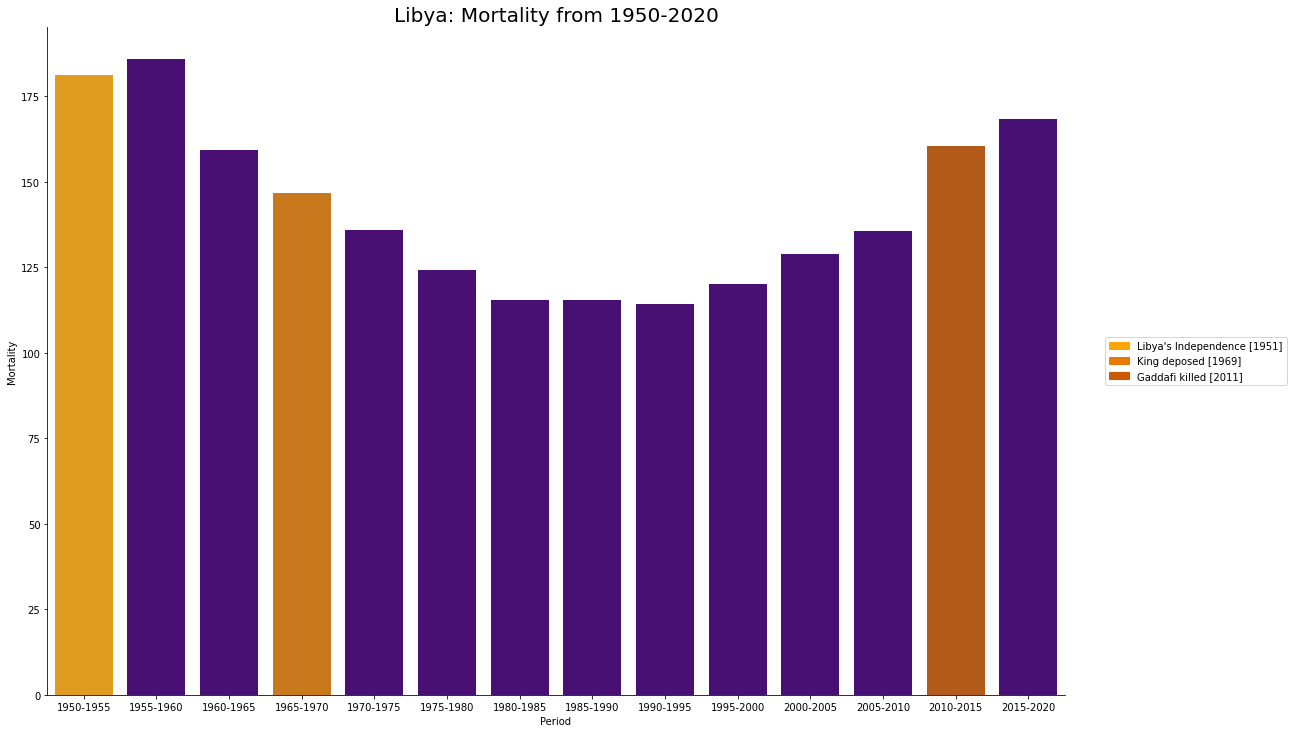

The Mortality changed by 2.55% post Libya's Independence
The Mortality changed by -14.75% post King deposed
The Mortality changed by 24.23% post Gaddafi killed


In [32]:
plot_barchart(consolidated_df,'Libya','Period','mortality_all_gender','Libya: Mortality from 1950-2020','Period','Mortality')

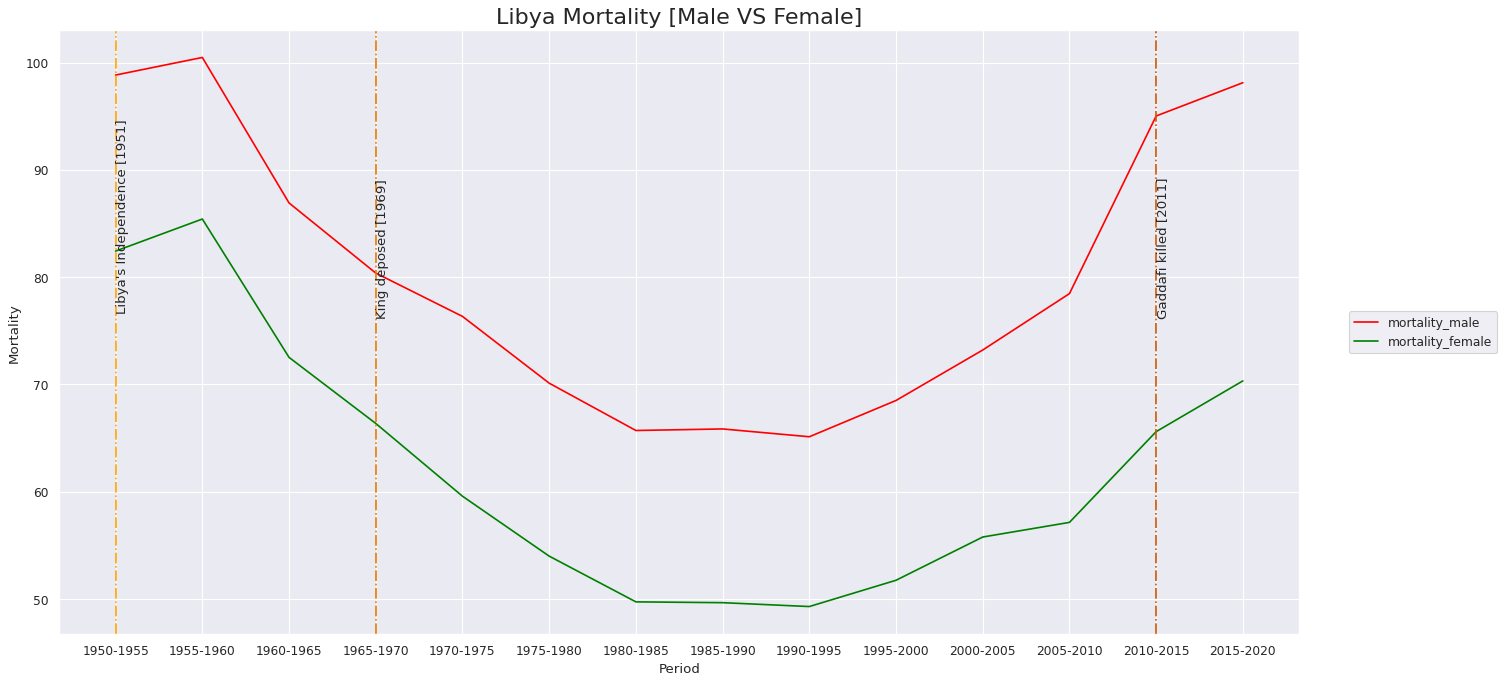

In [33]:
plot_linechart(consolidated_df,
               ['Libya'],
               'Period','Mortality',
               ['mortality_male','mortality_female'],
               'mortality_type',
               title='Libya Mortality [Male VS Female]')

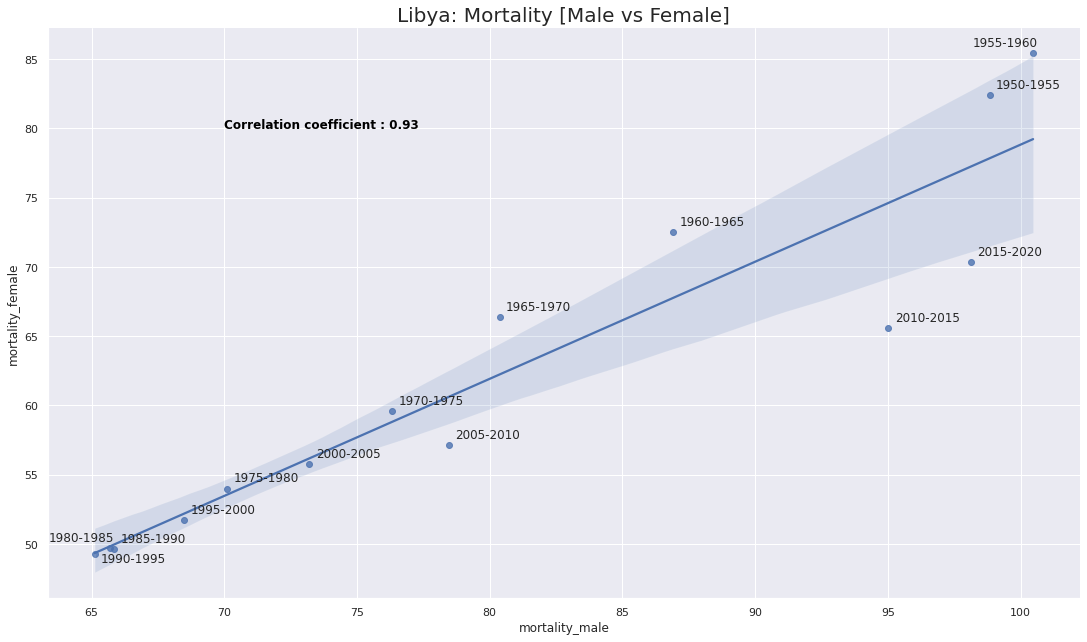

In [34]:
plot_correlation(consolidated_df,'Libya','mortality_male','mortality_female','Period','Libya: Mortality [Male vs Female]',text_pos=[70,80])

## Hypothesis 2

<i>In most of the cases with an increase in life-expectancy rate, the net migration rate decreases i.e. life-expectancy rate and net migration are negatively correlated.</i>

### Correlating Life Expectancy with Net Migration 

* Net Migration is calculated as the number of IMMIGRANTS minus the number of EMIGRANTS. Expressed in thousands

* Life Expectancy is the the average number of years of life of individuals who would be subject to the mortality rates of a given period. It is expressed as years.



In [35]:
interested_countries=['Afghanistan','Germany','Venezuela, Republic of','Libya','Myanmar','Iraq']
filter_condition=consolidated_df['Country'].isin(interested_countries)
filtered_df=consolidated_df[filter_condition]
filtered_df.groupby('Country')[['migration','life_expectancy_all_gender']].corr()

migration  life_expectancy_all_gender
Country                                                                      
Afghanistan migration                    1.000000                    0.072894
            life_expectancy_all_gender   0.072894                    1.000000
Germany     migration                    1.000000                    0.560483
            life_expectancy_all_gender   0.560483                    1.000000
Iraq        migration                    1.000000                   -0.024649
            life_expectancy_all_gender  -0.024649                    1.000000
Libya       migration                    1.000000                   -0.418671
            life_expectancy_all_gender  -0.418671                    1.000000
Myanmar     migration                    1.000000                   -0.759127
            life_expectancy_all_gender  -0.759127                    1.000000

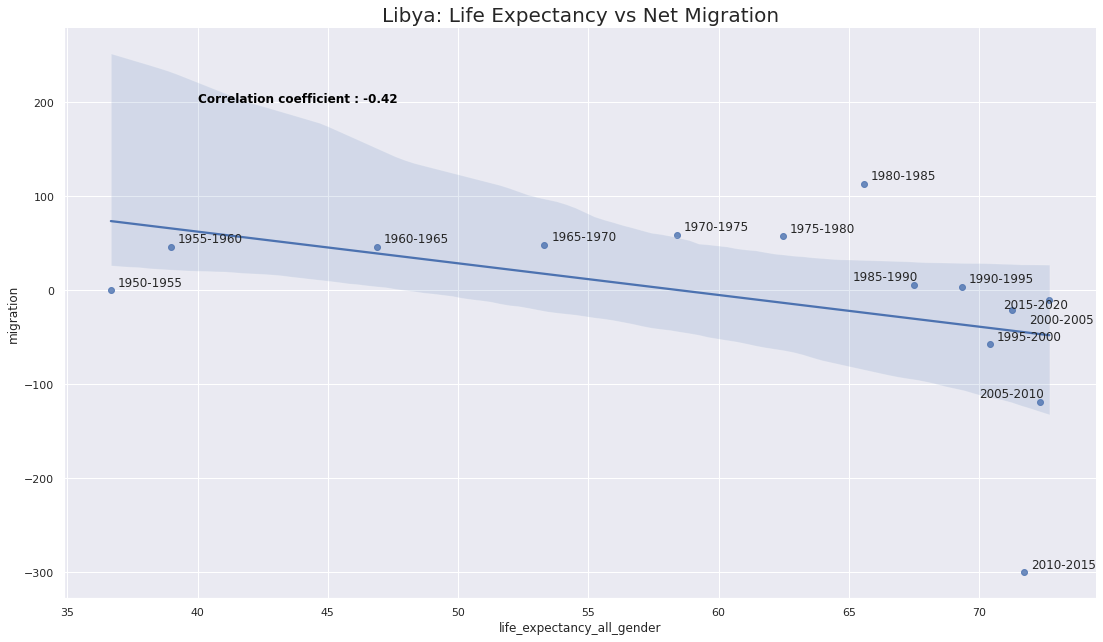

In [36]:
plot_correlation(consolidated_df,'Libya',
                 'life_expectancy_all_gender',
                 'migration',
                 'Period',
                 'Libya: Life Expectancy vs Net Migration',text_pos=[40,200])

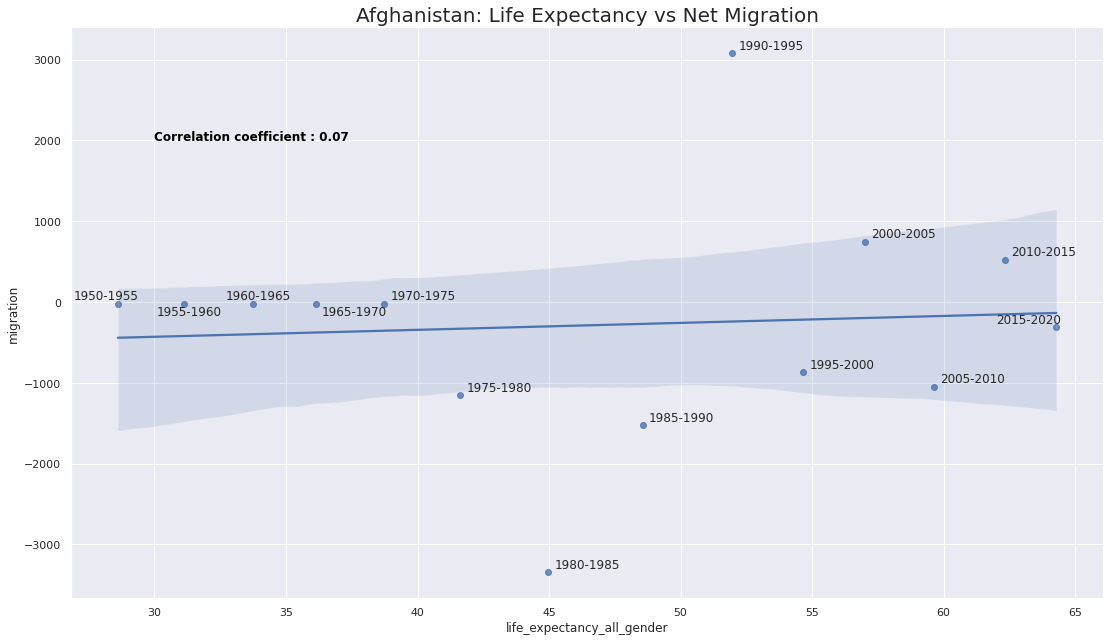

In [37]:
plot_correlation(consolidated_df,'Afghanistan',
                 'life_expectancy_all_gender','migration','Period',
                 'Afghanistan: Life Expectancy vs Net Migration',
                 text_pos=[30,2000])

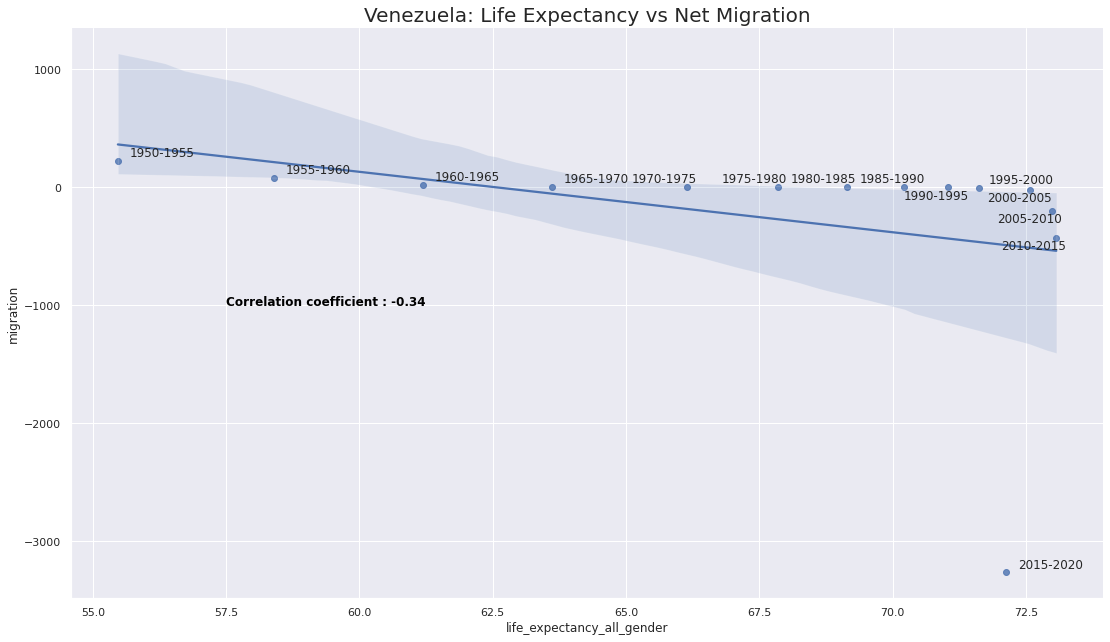

In [38]:
plot_correlation(consolidated_df,'Venezuela',
                 'life_expectancy_all_gender','migration','Period',
                 'Venezuela: Life Expectancy vs Net Migration',text_pos=[57.5,-1000])

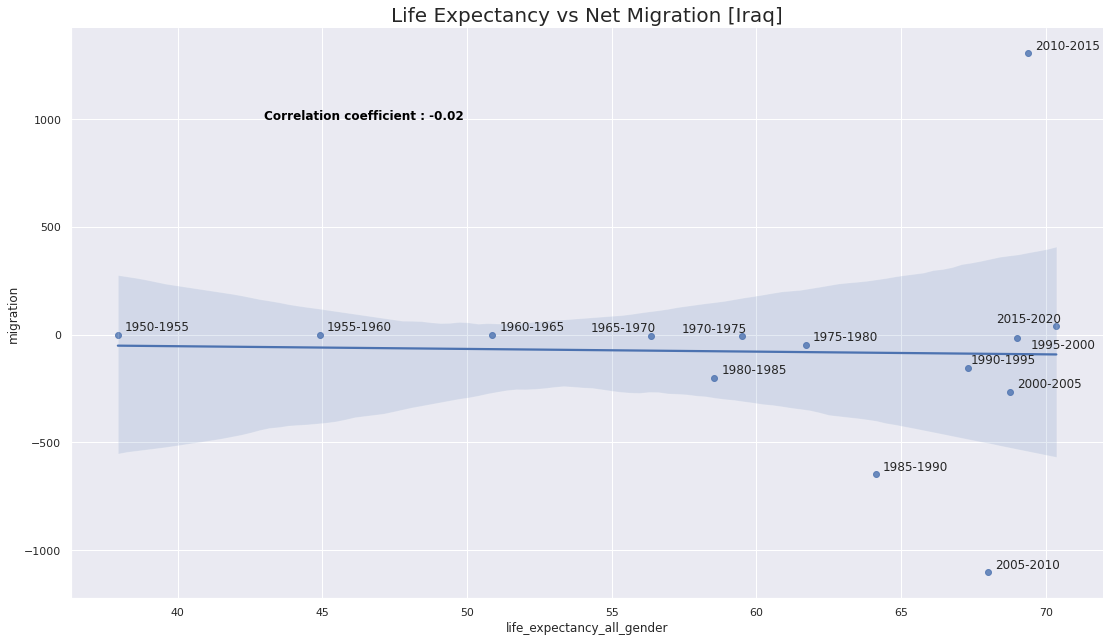

In [39]:
plot_correlation(consolidated_df,'Iraq',
                 'life_expectancy_all_gender','migration','Period',
                 'Life Expectancy vs Net Migration [Iraq]',text_pos=[43,1000])

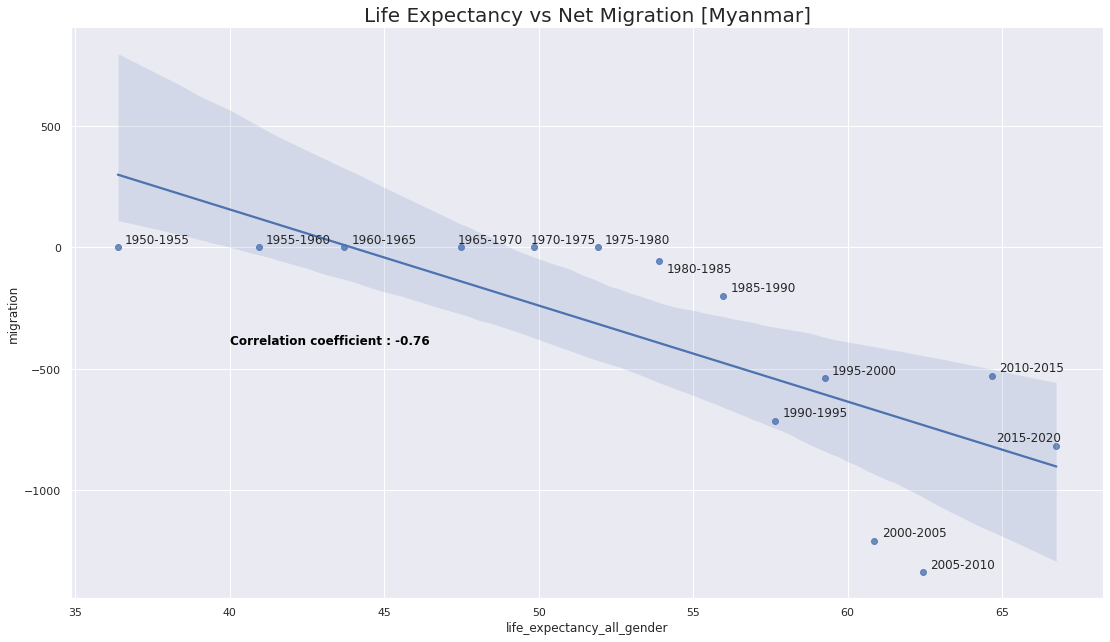

In [40]:
plot_correlation(consolidated_df,'Myanmar',
                 'life_expectancy_all_gender','migration','Period',
                 'Life Expectancy vs Net Migration [Myanmar]',text_pos=[40,-400])

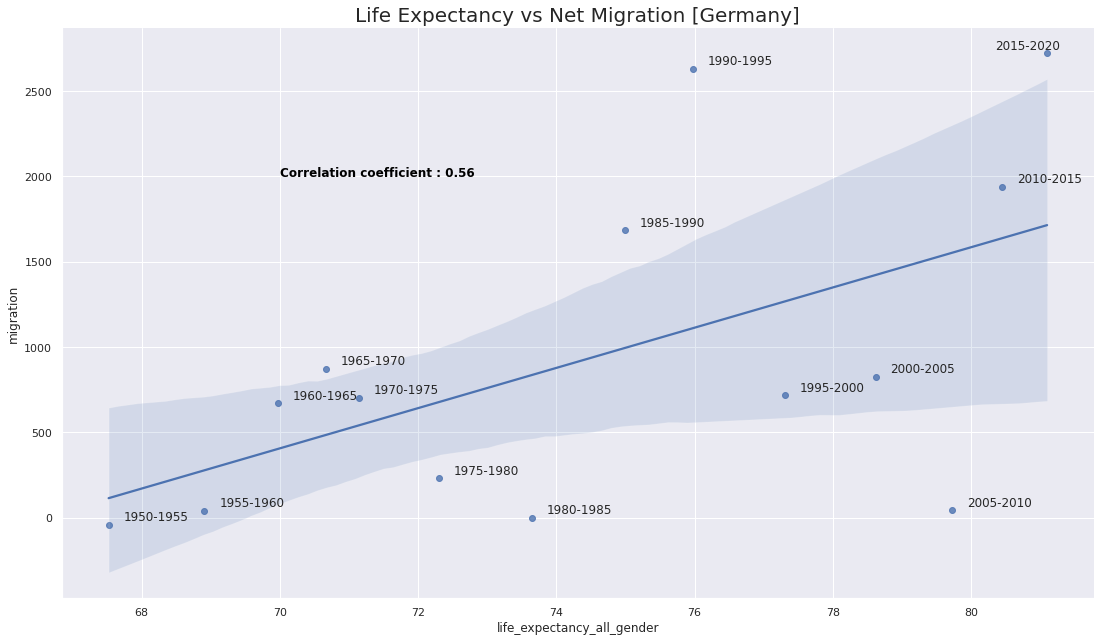

In [41]:
plot_correlation(consolidated_df,'Germany',
                 'life_expectancy_all_gender','migration','Period',
                 'Life Expectancy vs Net Migration [Germany]',text_pos=[70,2000])

Hypothesis 3

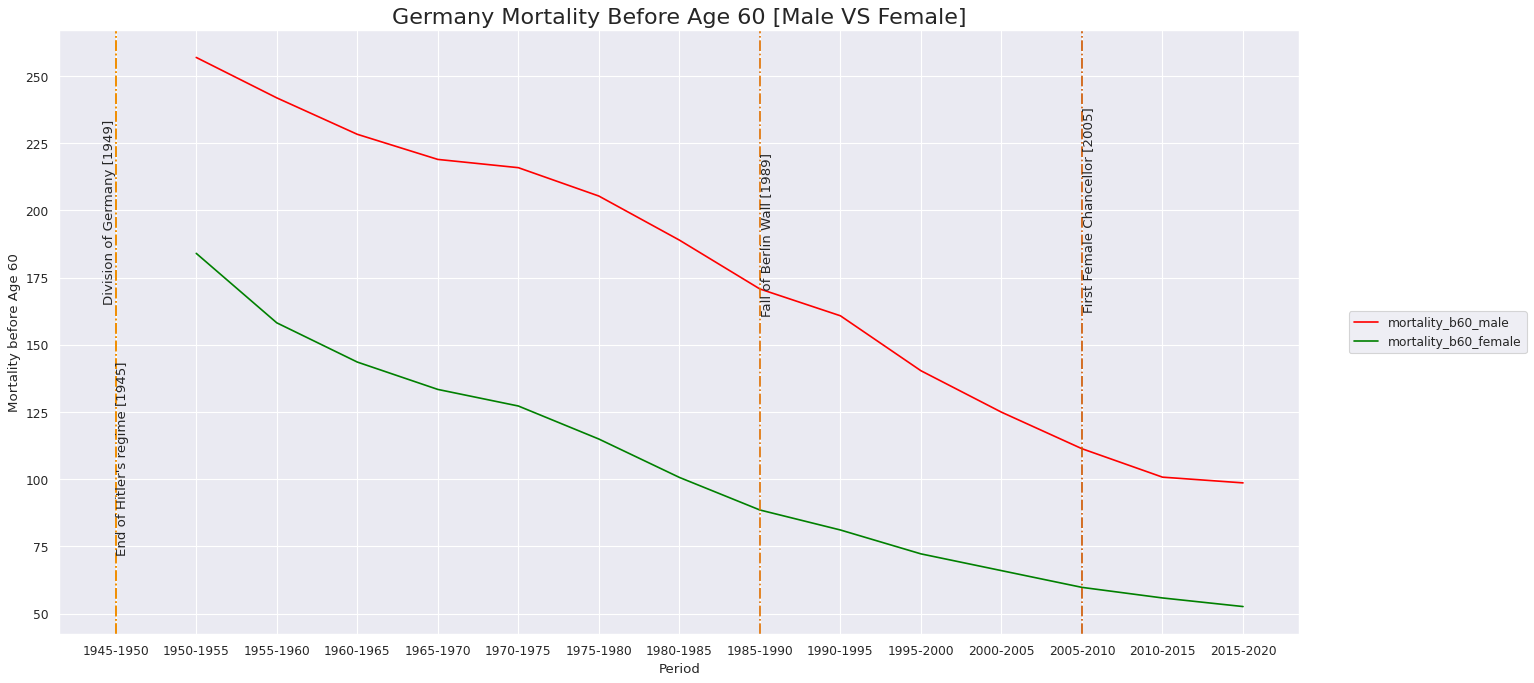

In [42]:
plot_linechart(consolidated_df,['Germany'],'Period','Mortality before Age 60',['mortality_b60_male','mortality_b60_female'],'mortality_type',title='Germany Mortality Before Age 60 [Male VS Female]')

In [43]:
display(calculate_percent_change(consolidated_df,
                                 ['Afghanistan','Germany'],
                                 level_two=['male','female'],
                                 calc_attrs=['mortality_b60_male','mortality_b60_female'],
                                 level_two_name='Gender',
                                 pre_name="Mean Mortality Under Age 60 [Pre]",
                                 post_name='Mean Mortality Under Age 60 [Post]'))

Period  ... % Change
Country     Gender Year             ...         
Afghanistan female 1953  1950-1955  ...      NaN
                   1973  1970-1975  ...   -17.37
                   1980  1980-1985  ...   -17.03
                   1992  1990-1995  ...      NaN
                   1996  1995-2000  ...      NaN
                   2001  2000-2005  ...      NaN
                   2021  2020-2025  ...      NaN
            male   1953  1950-1955  ...      NaN
                   1973  1970-1975  ...   -15.96
                   1980  1980-1985  ...   -15.34
                   1992  1990-1995  ...      NaN
                   1996  1995-2000  ...      NaN
                   2001  2000-2005  ...      NaN
                   2021  2020-2025  ...      NaN
Germany     female 1945  1945-1950  ...      NaN
                   1949  1945-1950  ...      NaN
                   1989  1985-1990  ...   -46.81
                   2005  2005-2010  ...   -25.84
            male   1945  1945-1950  ...      NaN
                   1949  1945-1950  ...      NaN
                   1989  1985-1990  ...   -36.12
                   2005  2005-2010  ...   -29.80

[22 rows x 5 columns]

Hypothesis 4

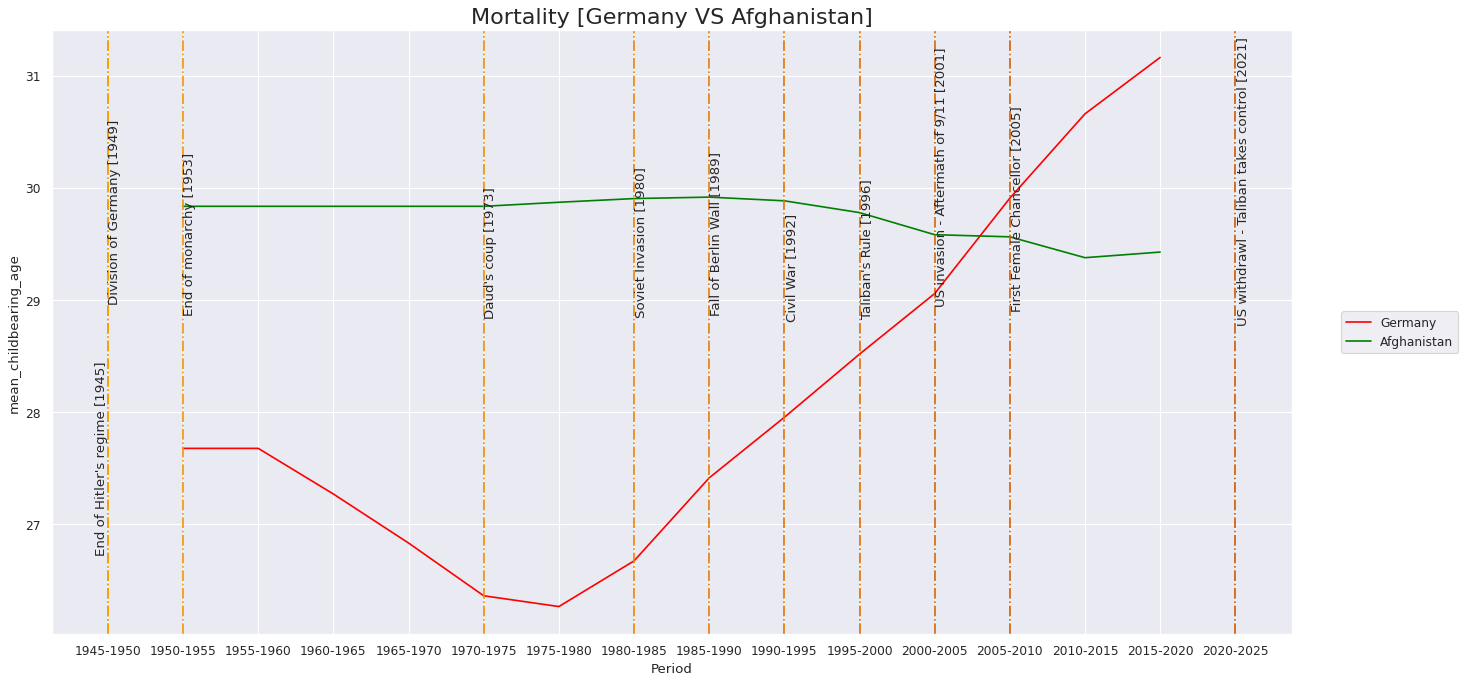

In [44]:
plot_linechart(consolidated_df,
               ['Germany','Afghanistan'],
               'Period',
               'mean_childbearing_age',
               title='Mortality [Germany VS Afghanistan]',melt_flag=False,hue='Country')

In [45]:
display(calculate_percent_change(consolidated_df,
                                 ['Germany','Afghanistan'],
                                 level_two=['Child Bearing Age'],
                                 calc_attrs=['mean_childbearing_age'],
                                 level_two_name='Parameter',
                                 pre_name="Mean Child Bearing Age 60 [Pre]",
                                 post_name='Mean Child Bearing Age 60 [Post]'))

Period  ... % Change
Country     Parameter         Year             ...         
Germany     Child Bearing Age 1945  1945-1950  ...      NaN
                              1949  1945-1950  ...      NaN
                              1989  1985-1990  ...     5.71
                              2005  2005-2010  ...     8.42
Afghanistan Child Bearing Age 1953  1950-1955  ...      NaN
                              1973  1970-1975  ...     0.10
                              1980  1980-1985  ...     0.17
                              1992  1990-1995  ...      NaN
                              1996  1995-2000  ...      NaN
                              2001  2000-2005  ...      NaN
                              2021  2020-2025  ...      NaN

[11 rows x 5 columns]

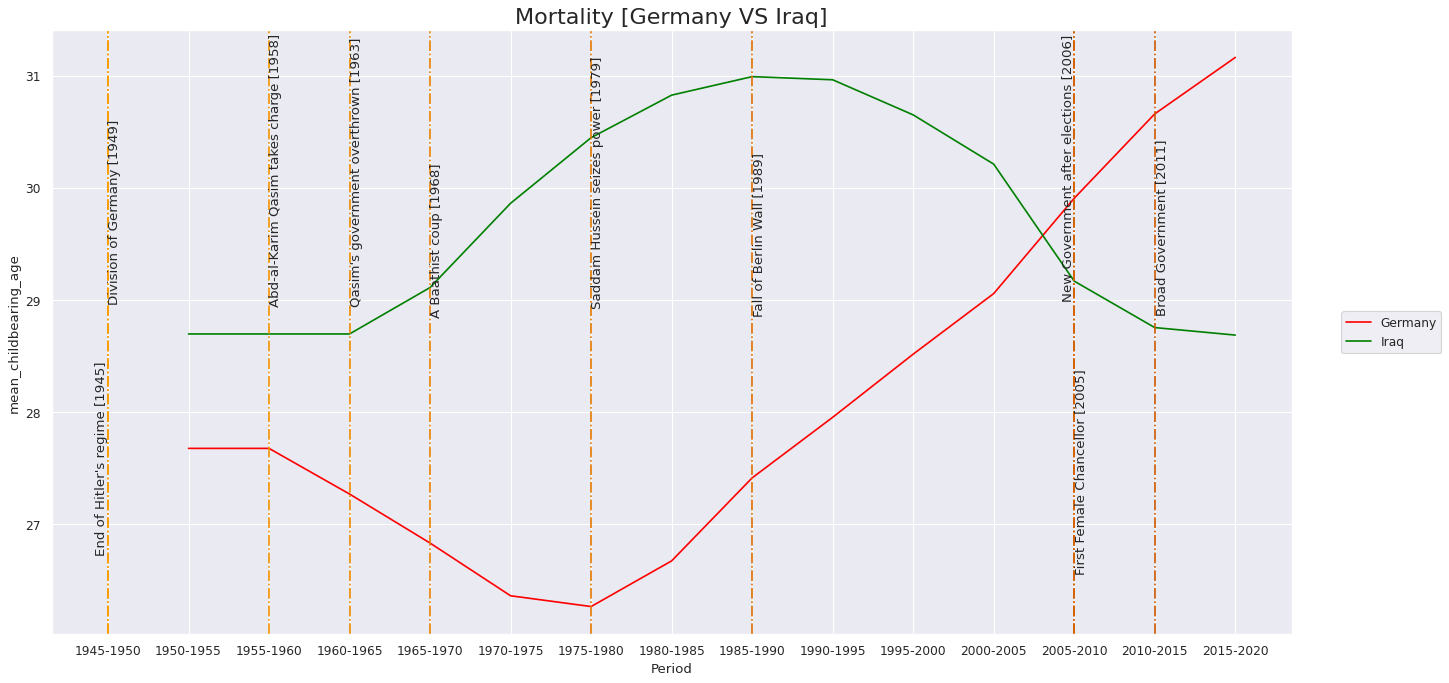

In [46]:
plot_linechart(consolidated_df,
               ['Germany','Iraq'],
               'Period',
               'mean_childbearing_age',
               title='Mortality [Germany VS Iraq]',melt_flag=False,hue='Country')

In [47]:
display(calculate_percent_change(consolidated_df,
                                 ['Germany','Iraq'],
                                 level_two=['Child Bearing Age'],
                                 calc_attrs=['mean_childbearing_age'],
                                 level_two_name='Parameter',
                                 pre_name="Mean Child Bearing Age 60 [Pre]",
                                 post_name='Mean Child Bearing Age 60 [Post]'))

Period  ... % Change
Country Parameter         Year             ...         
Germany Child Bearing Age 1945  1945-1950  ...      NaN
                          1949  1945-1950  ...      NaN
                          1989  1985-1990  ...     5.71
                          2005  2005-2010  ...     8.42
Iraq    Child Bearing Age 1958  1955-1960  ...      NaN
                          1963  1960-1965  ...      NaN
                          1968  1965-1970  ...      NaN
                          1979  1975-1980  ...     2.91
                          2006  2005-2010  ...      NaN
                          2011  2010-2015  ...      NaN

[10 rows x 5 columns]

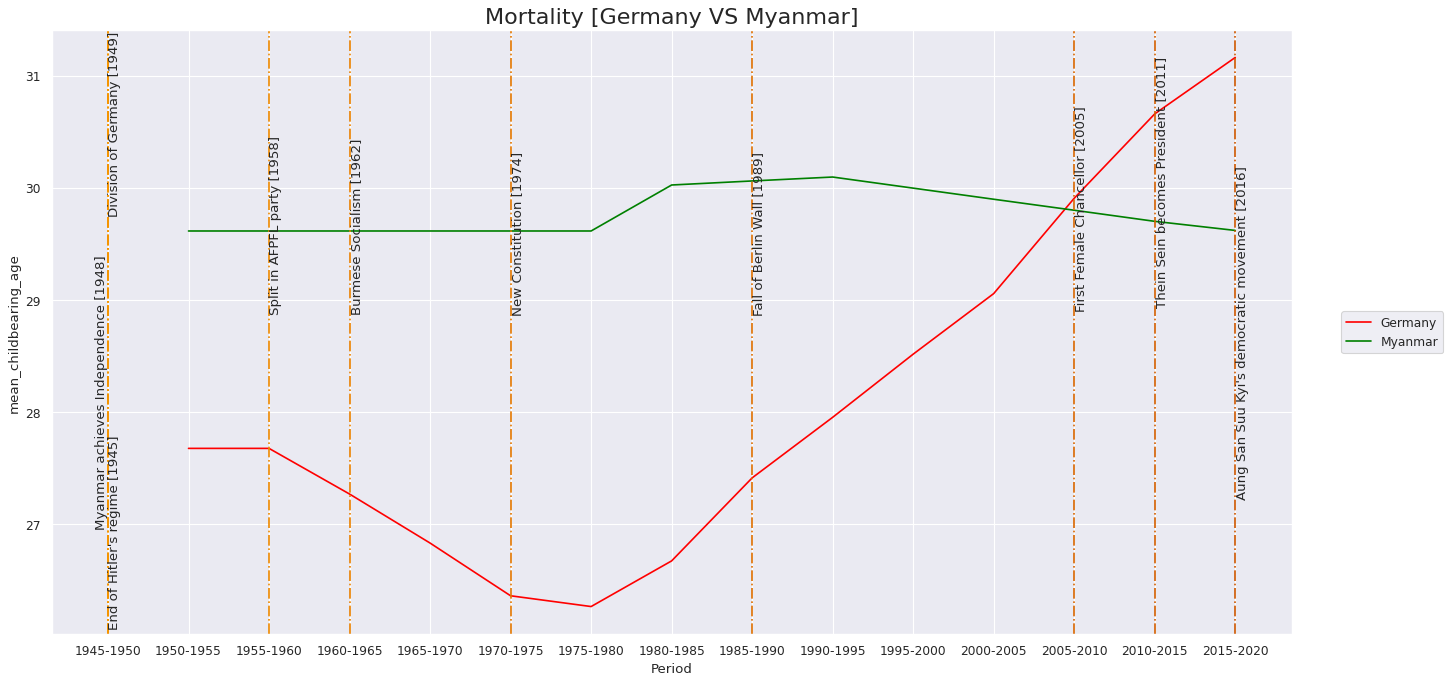

In [48]:
plot_linechart(consolidated_df,
               ['Germany','Myanmar'],
               'Period',
               'mean_childbearing_age',
               title='Mortality [Germany VS Myanmar]',melt_flag=False,hue='Country')

In [49]:
display(calculate_percent_change(consolidated_df,
                                 ['Germany','Myanmar'],
                                 level_two=['Child Bearing Age'],
                                 calc_attrs=['mean_childbearing_age'],
                                 level_two_name='Parameter',
                                 pre_name="Mean Child Bearing Age 60 [Pre]",
                                 post_name='Mean Child Bearing Age 60 [Post]'))

Period  ... % Change
Country Parameter         Year             ...         
Germany Child Bearing Age 1945  1945-1950  ...      NaN
                          1949  1945-1950  ...      NaN
                          1989  1985-1990  ...     5.71
                          2005  2005-2010  ...     8.42
Myanmar Child Bearing Age 1948  1945-1950  ...      NaN
                          1958  1955-1960  ...      NaN
                          1962  1960-1965  ...      NaN
                          1974  1970-1975  ...     1.08
                          2011  2010-2015  ...      NaN
                          2016  2015-2020  ...      NaN

[10 rows x 5 columns]

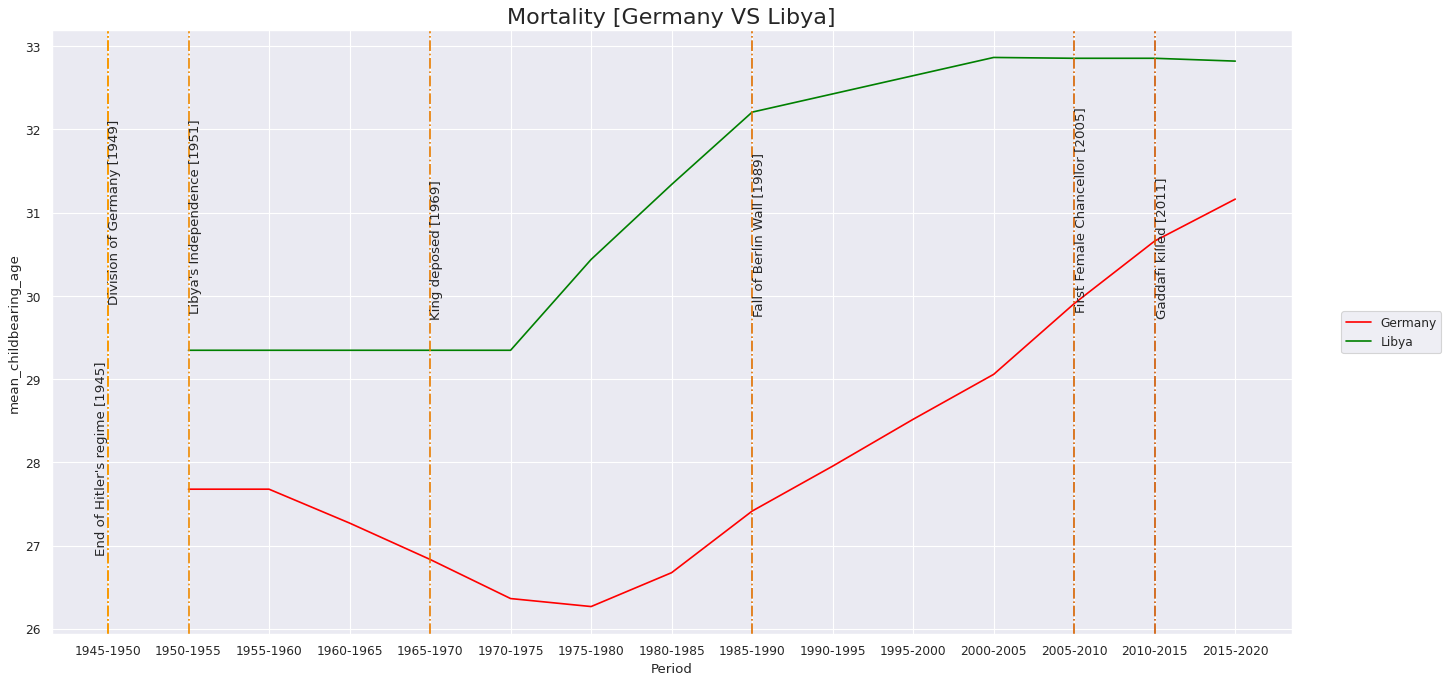

In [50]:
plot_linechart(consolidated_df,
               ['Germany','Libya'],
               'Period',
               'mean_childbearing_age',
               title='Mortality [Germany VS Libya]',melt_flag=False,hue='Country')

In [51]:
display(calculate_percent_change(consolidated_df,
                                 ['Germany','Libya'],
                                 level_two=['Child Bearing Age'],
                                 calc_attrs=['mean_childbearing_age'],
                                 level_two_name='Parameter',
                                 pre_name="Mean Child Bearing Age 60 [Pre]",
                                 post_name='Mean Child Bearing Age 60 [Post]'))

Period  ... % Change
Country Parameter         Year             ...         
Germany Child Bearing Age 1945  1945-1950  ...      NaN
                          1949  1945-1950  ...      NaN
                          1989  1985-1990  ...     5.71
                          2005  2005-2010  ...     8.42
Libya   Child Bearing Age 1951  1950-1955  ...      NaN
                          1969  1965-1970  ...     8.21
                          2011  2010-2015  ...     3.34

[7 rows x 5 columns]

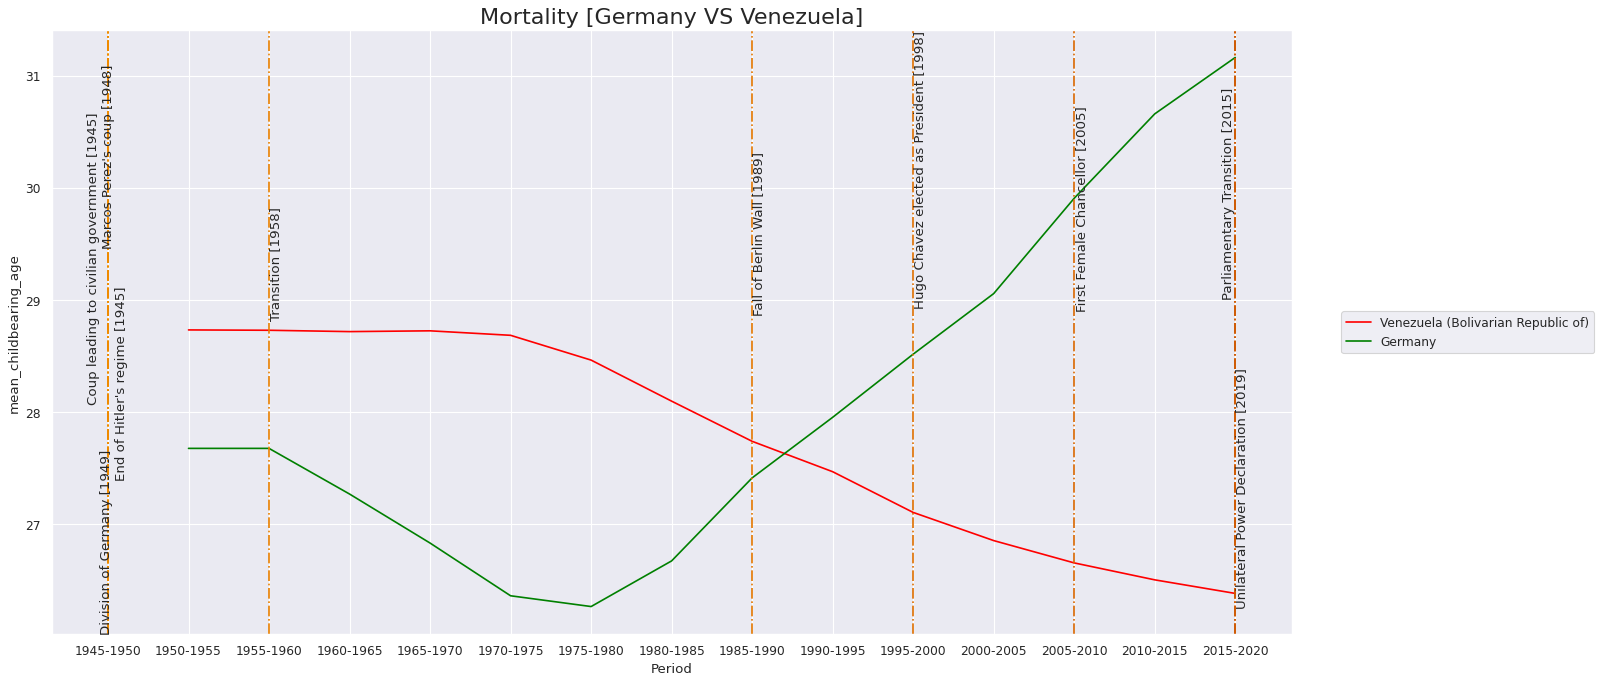

In [52]:
plot_linechart(consolidated_df,
               ['Germany','Venezuela'],
               'Period',
               'mean_childbearing_age',
               title='Mortality [Germany VS Venezuela]',melt_flag=False,hue='Country')

In [53]:
display(calculate_percent_change(consolidated_df,
                                 ['Germany','Venezuela'],
                                 level_two=['Child Bearing Age'],
                                 calc_attrs=['mean_childbearing_age'],
                                 level_two_name='Parameter',
                                 pre_name="Mean Child Bearing Age 60 [Pre]",
                                 post_name='Mean Child Bearing Age 60 [Post]'))

Period  ... % Change
Country   Parameter         Year             ...         
Germany   Child Bearing Age 1945  1945-1950  ...      NaN
                            1949  1945-1950  ...      NaN
                            1989  1985-1990  ...     5.71
                            2005  2005-2010  ...     8.42
Venezuela Child Bearing Age 1945  1945-1950  ...      NaN
                            1948  1945-1950  ...      NaN
                            1958  1955-1960  ...    -1.60
                            1998  1995-2000  ...    -5.66
                            2015  2015-2020  ...      NaN
                            2019  2015-2020  ...      NaN

[10 rows x 5 columns]